## Import libs

In [1]:
from __future__ import print_function, division, absolute_import
import os
import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from scipy import signal
import sys
sys.path.insert(0,'../..')
print(sys.path)
from mtfunc.helper import *
import safeopt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import tqdm
# plt.style.use('science')


['../..', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/fig_scripts/optimizer_eval', '/opt/anaconda3/envs/env1/lib/python39.zip', '/opt/anaconda3/envs/env1/lib/python3.9', '/opt/anaconda3/envs/env1/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages/IPython/extensions', '/Users/adrianpaeckelripoll/.ipython']
/Users/adrianpaeckelripoll/rbc-parameter-tuning/mtfunc   was appended to PYTHONPATH


In [2]:
rnd_opt_cst=get_data('NL_opt/mrnd_opt_cst_winter_3_1_2_2022_03_30_0404.npy')
rnd_opt_par=get_data('NL_opt/mrnd_opt_par_winter_3_1_2_2022_03_30_0404.npy')
# violations=get_data('violations/winter0536_violations.npy')
violations=[44, 45, 46, 57]
rnd_opt_cst=np.delete(rnd_opt_cst,violations,axis=0)
rnd_opt_par=np.delete(rnd_opt_par,violations,axis=0)


# Evaluation 

2
2
2
0.5
1
1
0.5
0.5
1
2
1
0.5
False
['0.5', '1', '0.5', '2', '2', '1', '2', '1', '0.5', '2', '0.5', '1']
[0.5, 1.0, 0.5, 2.0, 2.0, 1.0, 2.0, 1.0, 0.5, 2.0, 0.5, 1.0]
False
beta: 0.5 par_num 1


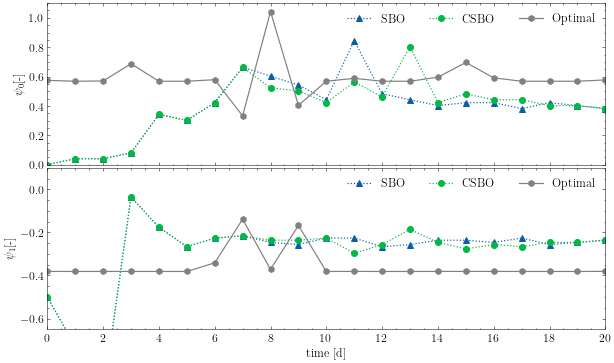

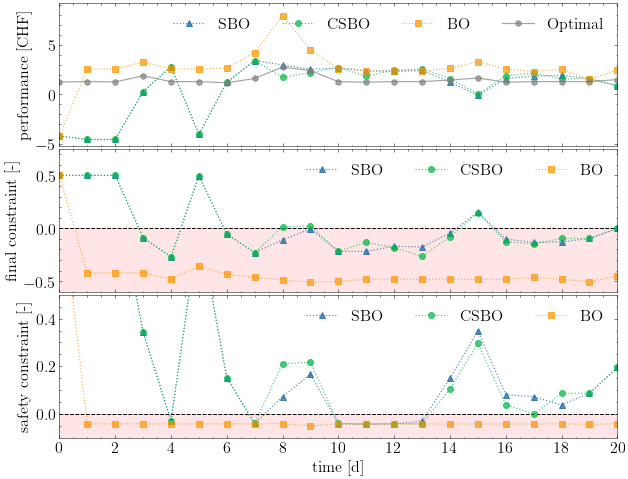

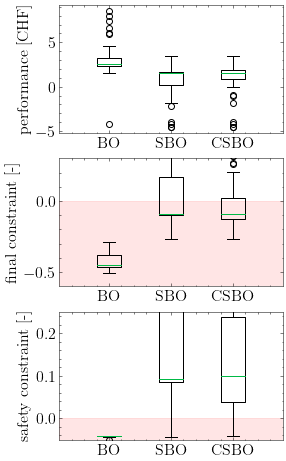

beta: 1 par_num 1


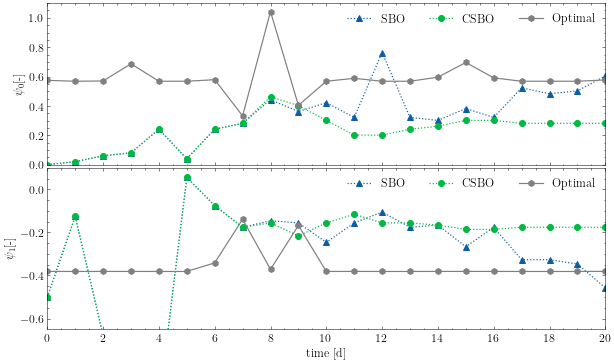

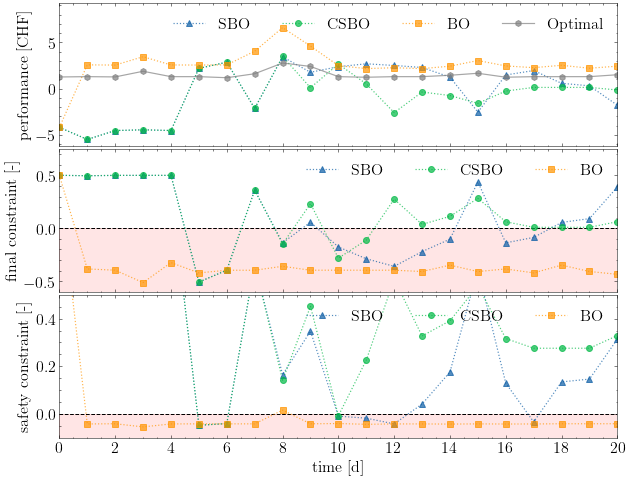

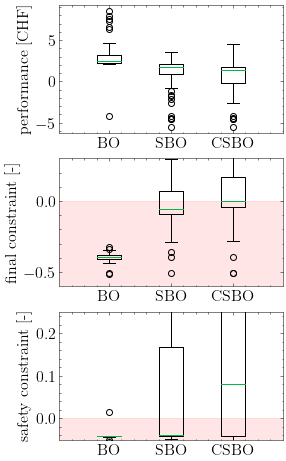

beta: 2 par_num 1


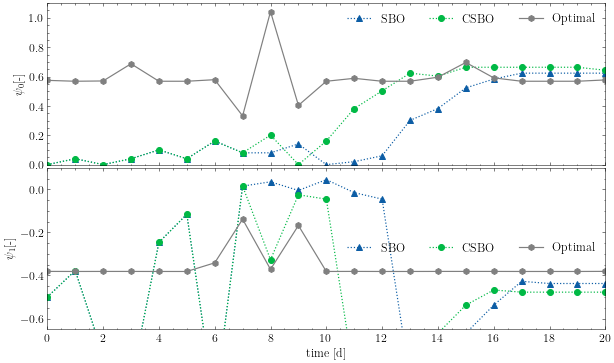

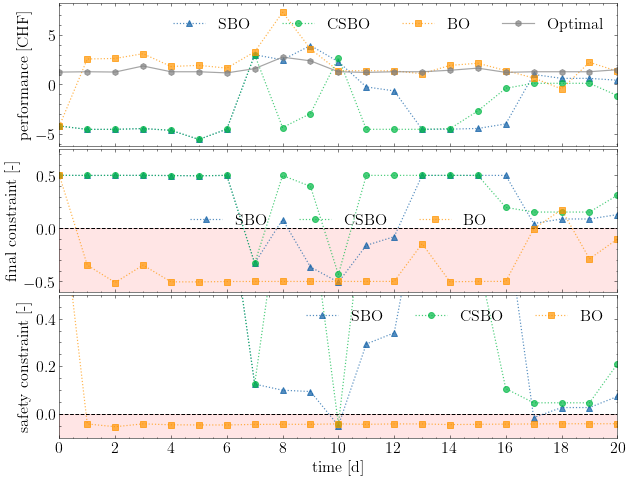

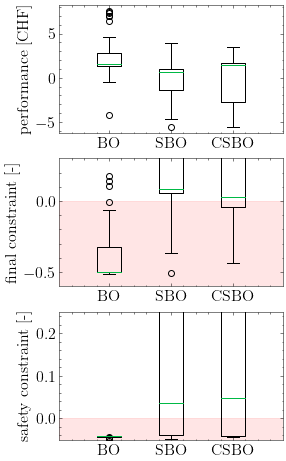

2
0.5
2
2
0.5
0.5
1
1
1
2
1
0.5
False
['0.5', '0.5', '2', '2', '0.5', '2', '1', '1', '0.5', '2', '1', '1']
[0.5, 0.5, 2.0, 2.0, 0.5, 2.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0]
False
beta: 0.5 par_num 2


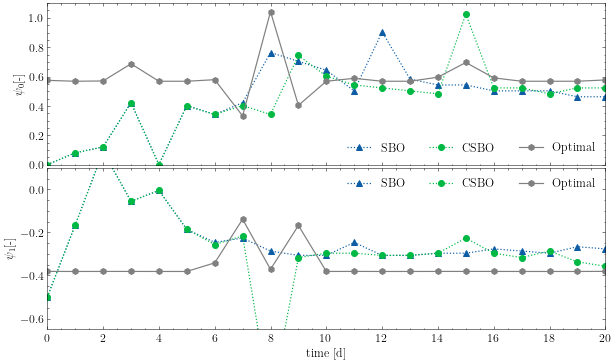

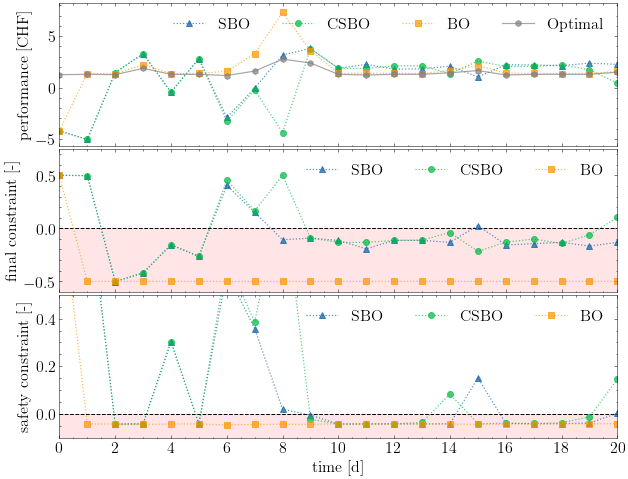

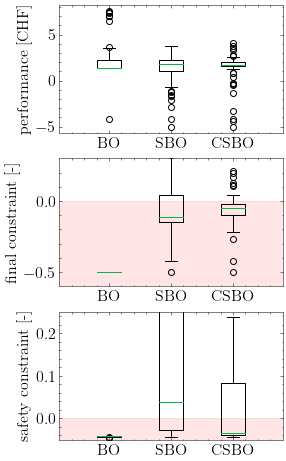

beta: 1 par_num 2


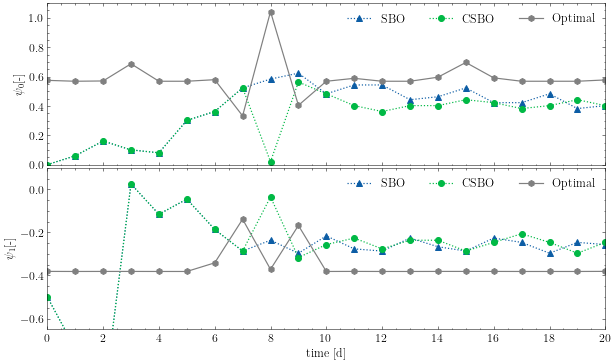

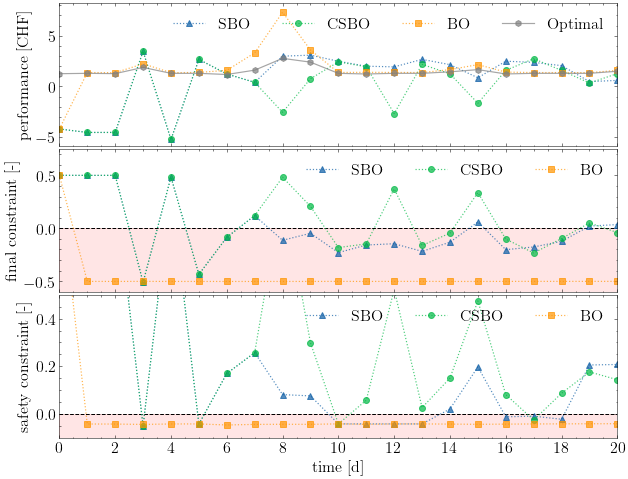

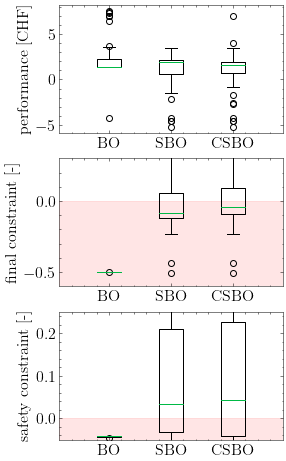

beta: 2 par_num 2


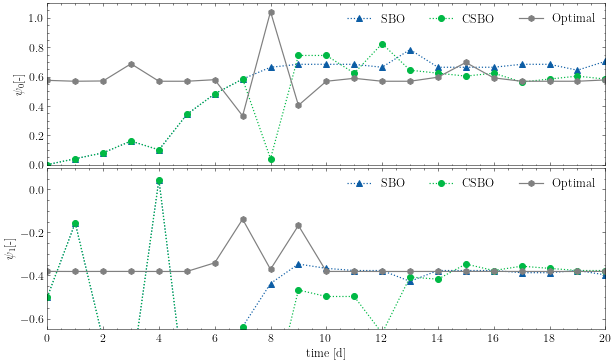

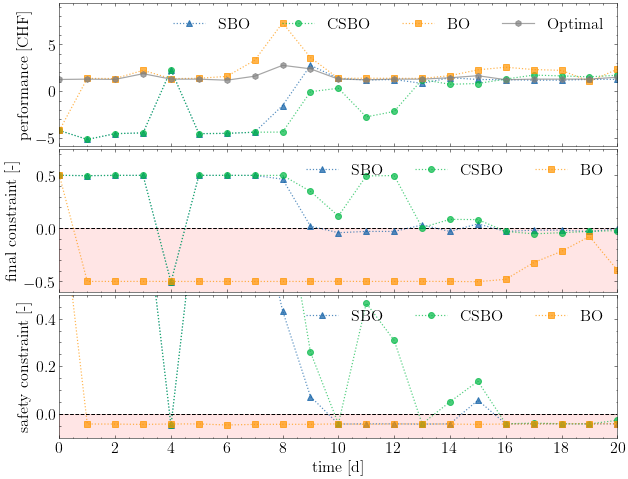

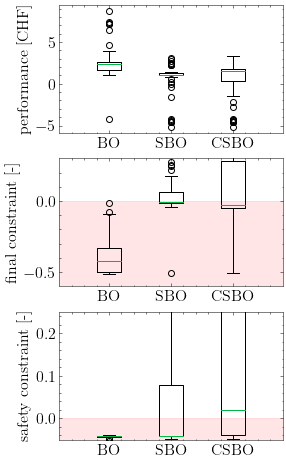

0.5
2
0.5
1
0.5
0.5
1
1
2
2
2
1
False
['0.5', '0.5', '1', '1', '2', '0.5', '2', '2', '1', '2', '0.5', '1']
[0.5, 0.5, 1.0, 1.0, 2.0, 0.5, 2.0, 2.0, 1.0, 2.0, 0.5, 1.0]
False
beta: 0.5 par_num 3


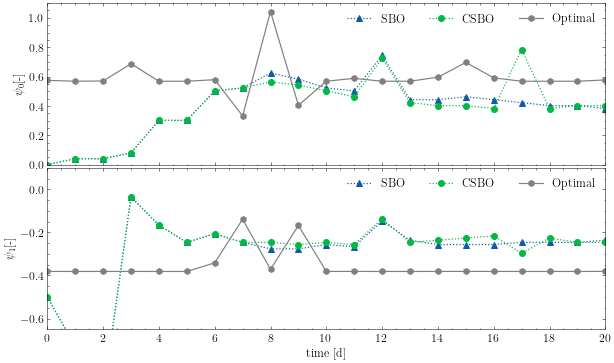

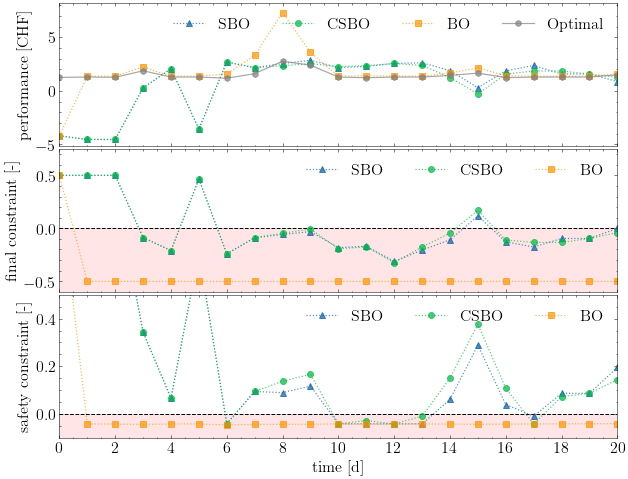

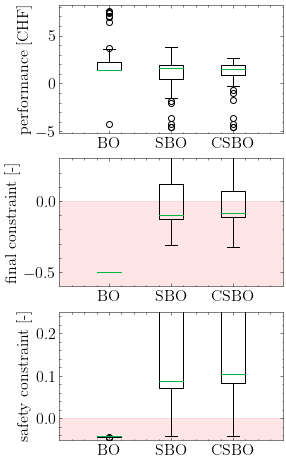

beta: 1 par_num 3


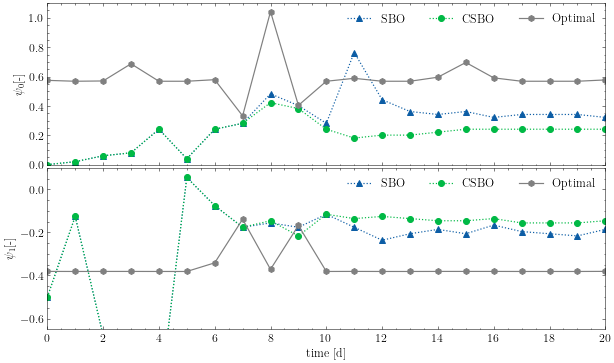

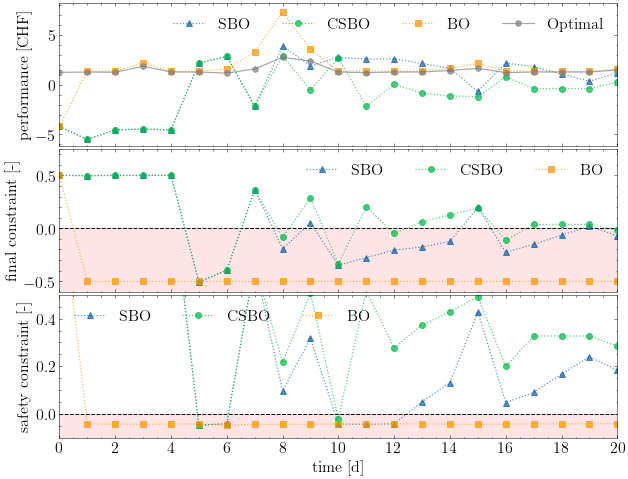

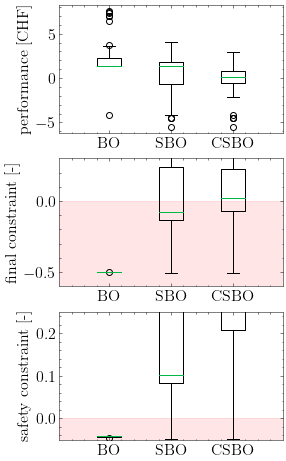

beta: 2 par_num 3


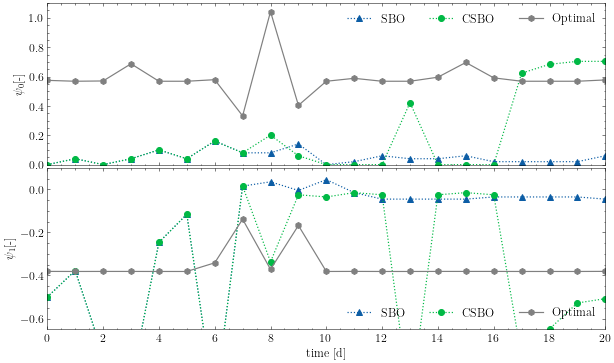

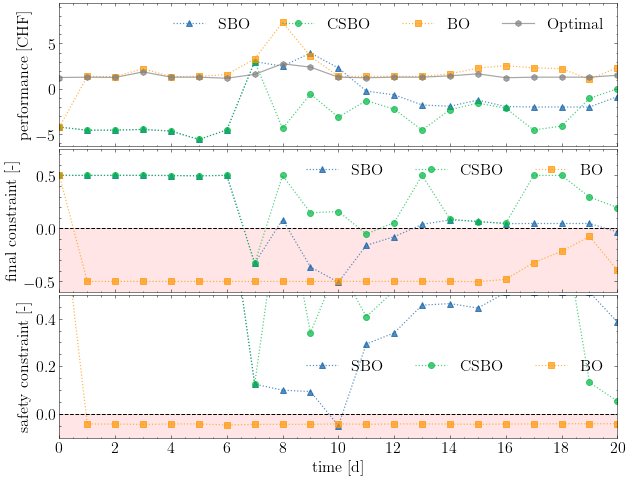

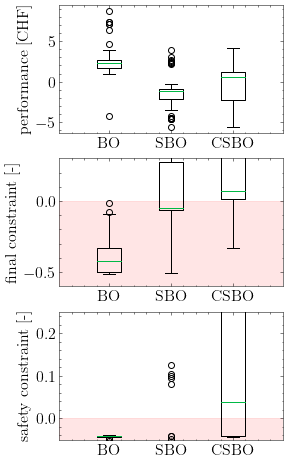

0.5
2
2
2
0.5
1
0.5
1
2
1
1
0.5
False
['2', '2', '0.5', '1', '0.5', '2', '0.5', '1', '2', '0.5', '1', '1']
[2.0, 2.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0, 2.0, 0.5, 1.0, 1.0]
False
beta: 0.5 par_num 4


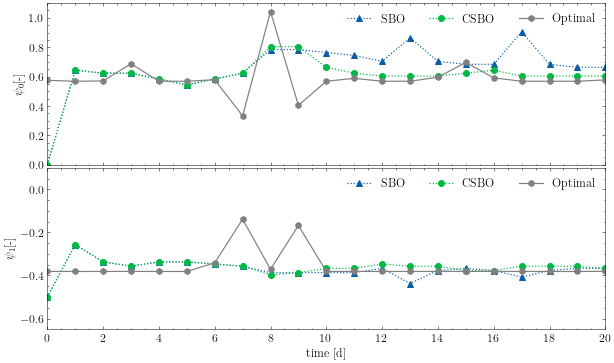

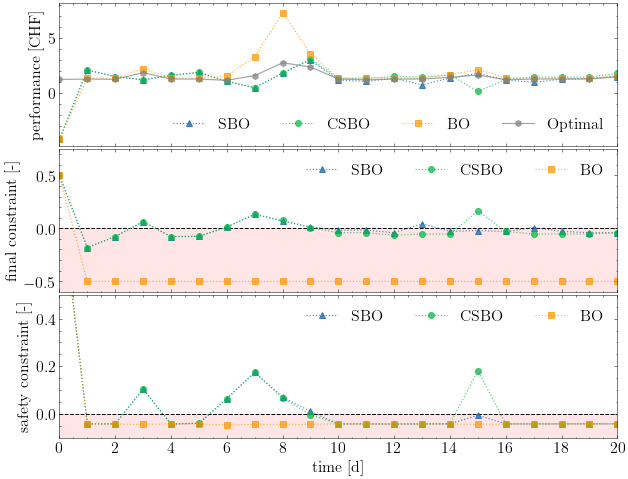

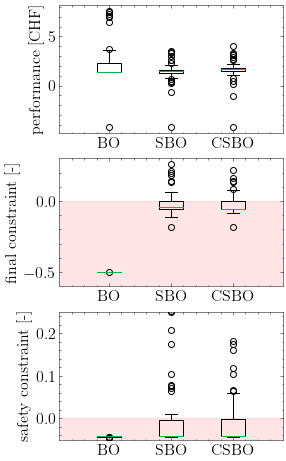

beta: 1 par_num 4


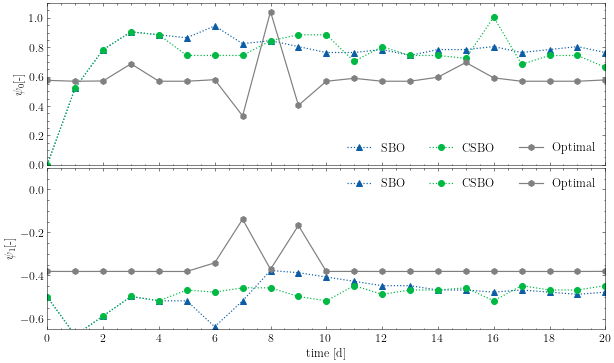

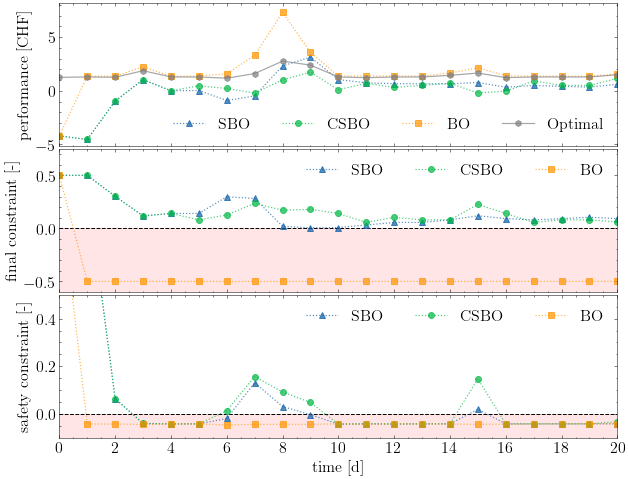

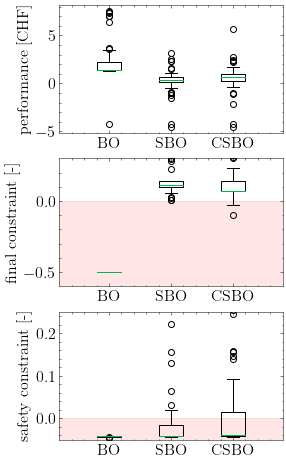

beta: 2 par_num 4


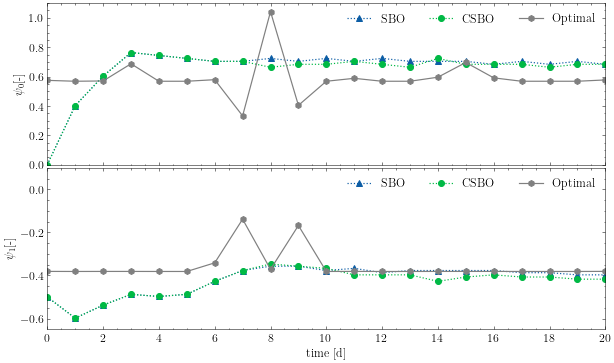

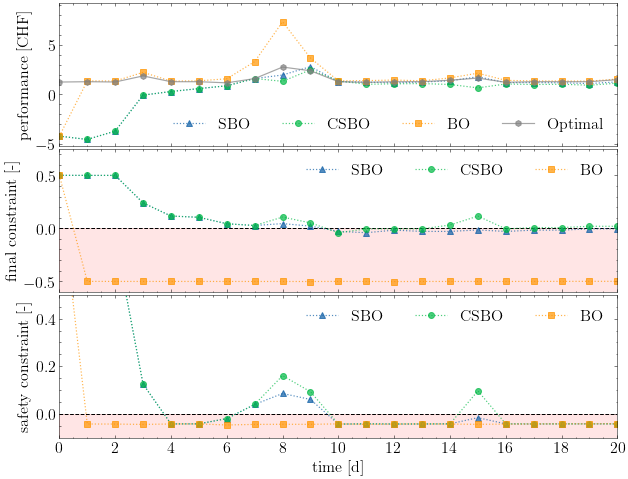

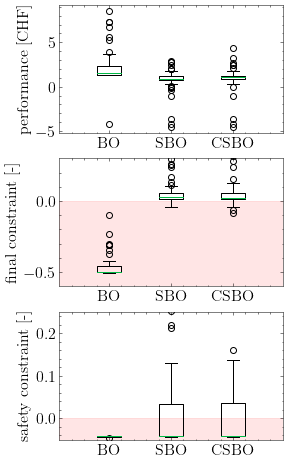

In [67]:
hp_list=[1,2,3,4]
tlim=20
fontsize=16
fontsize2=12
height2=6
height=8
x0=[0.,-0.5]
y0=[-4.2,0.5,0.96]
violations=[]
figfolder='QsQfFc'
for n in hp_list:
    import glob
    paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/x_post_loglike{n}*')
    file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
    betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
    for i, beta in enumerate(betas):
        print(beta)
        if beta.startswith('0.'):
            betas[i]=float(beta.replace('0.','.'))
        elif beta.startswith('0'):
            betas[i]=float(beta.replace('0','.'))  
        else:
            betas[i]=float(beta) # convert to float and add . to 05

    optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
    dates=[file_path[-19:-4] for file_path in file_paths] # get betas

    par=[]
    for i,path in enumerate(paths):
        foo=np.delete(get_data(path),violations,axis=0)
        foo[0,:]=x0
        par.append(foo)
#     par=np.delete(par,violations)
    par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
    par_df=par_df.set_index(['beta','optype']).sort_index()
    print(np.any(par_df.index.duplicated()))
    par_df=par_df[~par_df.index.duplicated()]

    paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/y_post_loglike{n}*')
    file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
    betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
    print(betas)
    for i, beta in enumerate(betas):
        if beta.startswith('0.'):
            betas[i]=float(beta.replace('0.','.'))
        elif beta.startswith('0'):
            betas[i]=float(beta.replace('0','.'))  
        else:
            betas[i]=float(beta) # convert to float and add . to 05

    optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
    dates=[file_path[-19:-4] for file_path in file_paths] # get betas
    print(betas)
    ct=10 #convergence time
    mae_=[]
    mae=[]
    cnst10=[]
    cnst0=[]
    cnst20=[]
    cnst15=[]
    cnst5=[]
    cts=[]
    cnst_hist=[]
    cnst_=[]
    sft_=[]
    cst_=[]
    for i,path in enumerate(paths):
        foo=np.delete(get_data(path),violations,axis=0)
        foo[0,:]=y0
        cst=foo
        cst_.append(cst)
        err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
        mae_.append(np.abs(err))
        mae.append(np.abs(err).sum()/(len(cst)-ct))   
        cnst=get_data(path)[:,1]
        sft=get_data(path)[:,2]        
        cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
        cnst10.append((cnst<-2e-2).astype(int).sum())
        cnst[cnst>0]=0
        cnst_.append(-cnst*50)
        sft[sft>0]=0
        sft_.append(-sft*50)        


    eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'cst_':cst_,'mae':mae,'mae_':mae_,'hst':cnst_hist,'date':dates,
                         'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_})
    eval_df=eval_df.set_index(['beta','optype']).sort_index()
    print(np.any(eval_df.index.duplicated()))
    eval_df=eval_df[~eval_df.index.duplicated()]
    betas_list=[0.5,1,2]
    for beta in betas_list:
        print('beta:',beta,'par_num',n)
        model_label=['SBO','CSBO','BO']
        marker=['^','o','s']
        #Parameter plot
        with plt.style.context('science'):
            plt.rcParams.update({'font.size': fontsize2})                        
            err=25e-2
            iterations=len(par_df.loc[(beta,'CSBO'),'par'][:,0])
            fig,ax=plt.subplots(2,sharex=True,figsize=(10,height2))
            for col,m in zip(model_label[:-1],marker[:-1]):
                ax[0].plot(range(iterations),par_df.loc[(beta,col),'par'][:,0],f':{m}',label=col,linewidth=1.2)
                ax[1].plot(range(iterations),par_df.loc[(beta,col),'par'][:,1],f':{m}',label=col,linewidth=1.2)
            ax[0].plot(range(iterations),rnd_opt_par[:iterations,0],'-h',label='Optimal',linewidth=1.2,color='grey')
            ax[1].plot(range(iterations),rnd_opt_par[:iterations,1],'-h',label='Optimal',linewidth=1.2,color='grey')
            ax[0].set_xticks(np.arange(0,iterations,2))
            ax[0].set_ylim([0,1.1])
            ax[1].set_ylim([-0.65,0.1])
            ax[0].set_ylabel(r'$\psi_0$[-]')
            ax[0].legend(ncol=3)    
            ax[1].set_ylabel(r'$\psi_1$[-]')
            ax[1].legend(ncol=3)

            plt.xlabel('time [d]')
            plt.xlim([0,tlim])
            plt.subplots_adjust(hspace=0.02)
            plt.savefig(f'{figfolder}/{n}_par_rp_b0_qs_32_qf_55_beta_{beta}.pdf')
            plt.show()
        # Performance and constraint plots    
        with plt.style.context('science'):
            err=25e-2
            plt.rcParams.update({'font.size': fontsize})            
            iterations=len(par_df.loc[(beta,'CSBO'),'par'][:,0])
            fig,ax=plt.subplots(3,sharex=True,figsize=(10,height))
            for col,m in zip(model_label,marker):
                ax[0].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,0],f':{m}',label=col,linewidth=1.2,alpha=0.7)
                ax[1].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,1],f':{m}',label=col,linewidth=1.2,alpha=0.7)
                ax[2].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,2],f':{m}',label=col,linewidth=1.2,alpha=0.7)
            ax[0].plot(range(iterations),-rnd_opt_cst[:iterations,0],'-h',label='Optimal',linewidth=1.2,color='grey',alpha=0.7)
            ax[1].hlines(0,0,iterations,'k',linestyles='--')
            ax[1].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)
            ax[2].hlines(0,0,iterations,'k',linestyles='--')
            ax[2].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)            
        #     ax[1].plot(range(iterations),rnd_opt_cst[:iterations,1],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[0].set_xticks(np.arange(0,iterations,2))
            ax[0].set_ylabel(r'performance [CHF]')
            ax[0].legend(ncol=4)    
#             ax[0].set_ylim([-5,6.2])            
            ax[1].set_ylim([-0.6,0.75])
            ax[2].set_ylim([-0.1,.5])            
            ax[1].set_ylabel(r'final constraint [-]')
            ax[1].legend(ncol=3)
            ax[2].set_ylabel(r'safety constraint [-]')    
            ax[2].legend(ncol=3)

            plt.xlabel('time [d]')
            plt.xlim([0,tlim])
            plt.subplots_adjust(hspace=0.02)
            plt.savefig(f'{figfolder}/{n}_prf_rp_b0_qs_32_qf_55_beta_{beta}.pdf')
            plt.show()
        model_label=['BO','SBO', 'CSBO']
        model_names=[ 'BO','SBO', 'CSBO']
        # MAE and violation boxplots
        with plt.style.context('science'):
            plt.rcParams.update({'font.size': fontsize})            
            fig,ax=plt.subplots(3,1,figsize=(4,height))
            for i,col in enumerate(model_label): 
                ax[0].boxplot(eval_df.loc[(beta,col)].cst_[:,0],showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[0].set_ylabel(r'performance [CHF]')
                ax[0].set_xlim([-0.2,0.7]) 
                ax[1].boxplot(eval_df.loc[(beta,col)].cst_[:,1],showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[1].set_ylabel(r'final constraint [-]')
                ax[1].set_xlim([-0.2,0.7]) 
                ax[1].set_ylim([-0.6,0.3])                 
                ax[2].boxplot(eval_df.loc[(beta,col)].cst_[:,2],showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[2].set_ylabel(r'safety constraint [-]')     
                ax[2].set_xlim([-0.2,0.7]) 
                ax[2].set_ylim([-0.05,0.25])                  
#                 plt.ylim([-0.001,None])
    #             plt.yscale('log')
            #     plt.ylabel(r'$\textrm{R}^2$')
    #         plt.locator_params(axis="y", nbins=5) 
    #         plt.margins(tight=True)  
        #     plt.legend(['beta'])
            ax[1].fill_between(np.arange(-1,2),y1=0,y2=-2,color='red',alpha=0.1)
            ax[2].fill_between(np.arange(-1,2),y1=0,y2=-2,color='red',alpha=0.1)   
            plt.savefig(f'{figfolder}/{n}_mae_qs_qf_boxplot_beta_{beta}.pdf')
            plt.show()

# All HP tested

In [24]:
hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
    cnst[cnst>0]=0
    cnst_.append(-cnst*50)
    cnstavg.append(-cnst.mean()*50)
    sft[sft>0]=0
    sft_.append(-sft*50) 
    sftavg.append(-sft.mean()*50)


eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df=eval_df.set_index(['beta','optype']).sort_index()
print(np.any(eval_df.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]


True
True


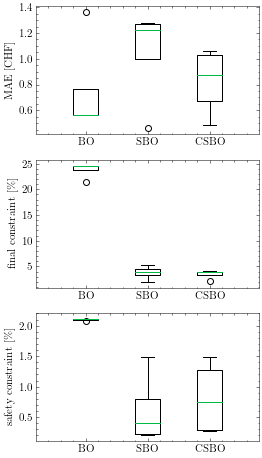

0.5


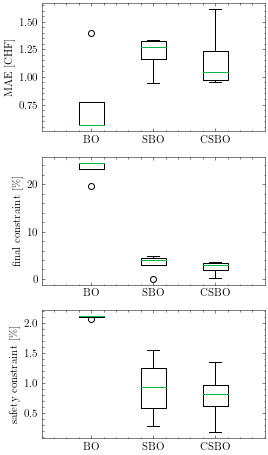

1


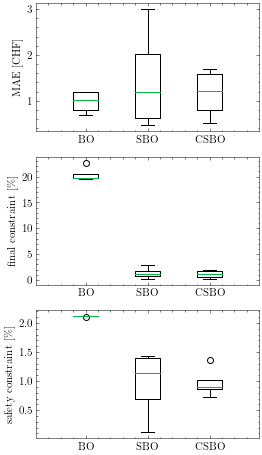

2


In [25]:
model_label=['BO','SBO', 'CSBO']
model_names=[ 'BO','SBO', 'CSBO']
for beta in [0.5,1,2]:
    with plt.style.context('science'):
        plt.rcParams.update({'font.size': 11})            
        fig,ax=plt.subplots(3,1,figsize=(4,height))

        for i,col in enumerate(model_label): 
            ax[0].boxplot(eval_df.loc[(beta,col)].mae,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
            ax[0].set_ylabel(r'MAE [CHF]')
            ax[0].set_xlim([-0.2,0.7]) 
            ax[1].boxplot(eval_df.loc[(beta,col)].cnst,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
            ax[1].set_ylabel(r'final constraint [\%]')
            ax[1].set_xlim([-0.2,0.7]) 
            ax[2].boxplot(eval_df.loc[(beta,col)].sft,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
            ax[2].set_ylabel(r'safety constraint [\%]')     
            ax[2].set_xlim([-0.2,0.7]) 
    #                 plt.ylim([-0.001,None])
    #             plt.yscale('log')
        #     plt.ylabel(r'$\textrm{R}^2$')
    #         plt.locator_params(axis="y", nbins=5) 
    #         plt.margins(tight=True)  
    #     plt.legend(['beta'])
        plt.savefig(f'{figfolder}/hp_mae_qs_qf_boxplot_beta_{beta}.pdf')
        plt.show()
    print(beta)
   

# Evaluation exact FC

2
1
0.5
False
['2', '0.5', '1']
[2.0, 0.5, 1.0]
False
beta: 0.5 par_num 1


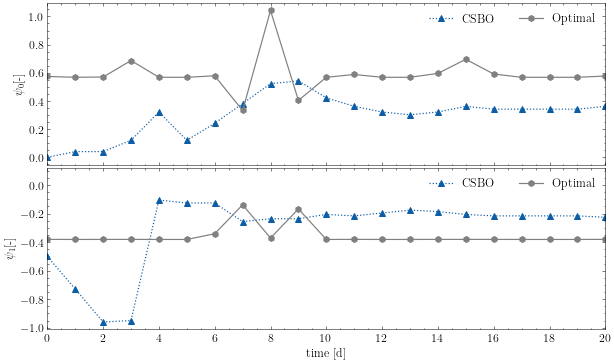

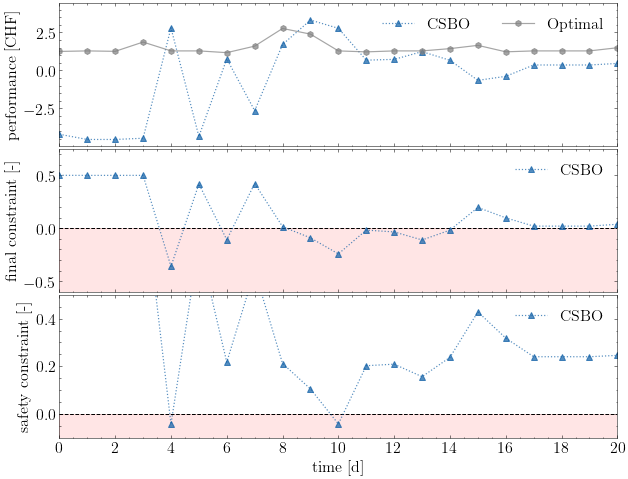

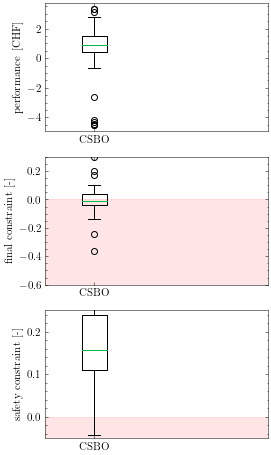

beta: 1 par_num 1


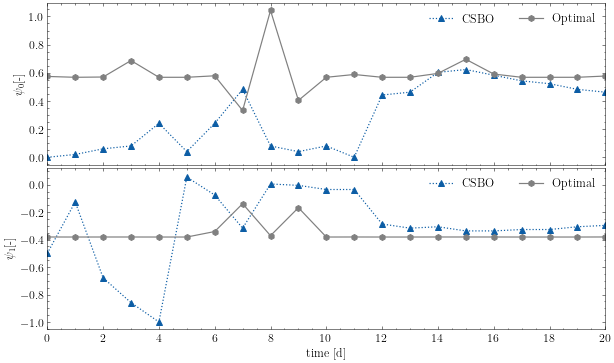

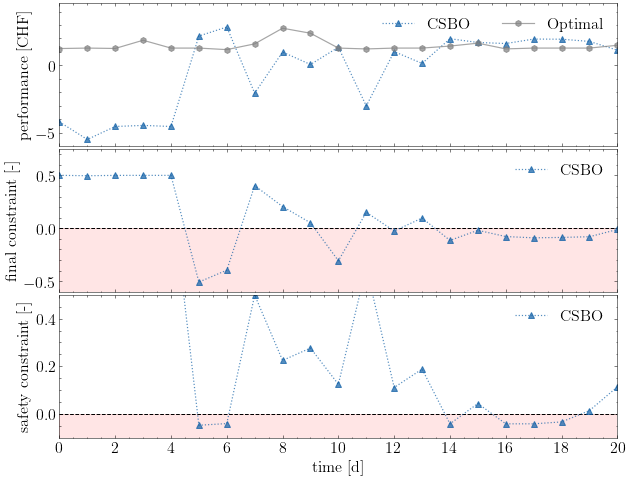

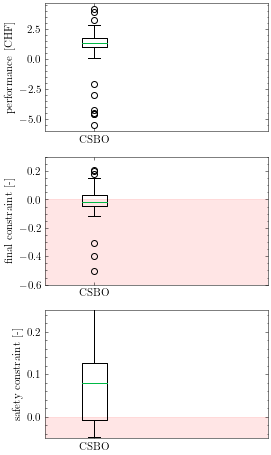

beta: 2 par_num 1


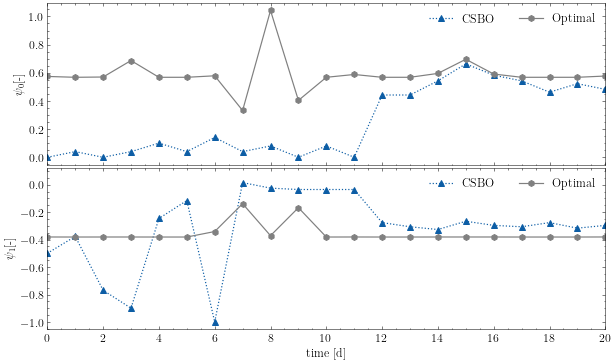

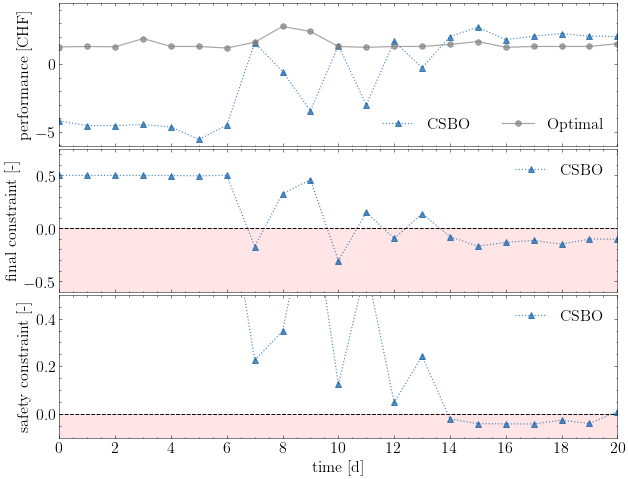

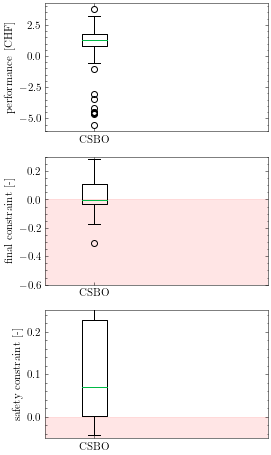

1
2
0.5
False
['1', '0.5', '2']
[1.0, 0.5, 2.0]
False
beta: 0.5 par_num 2


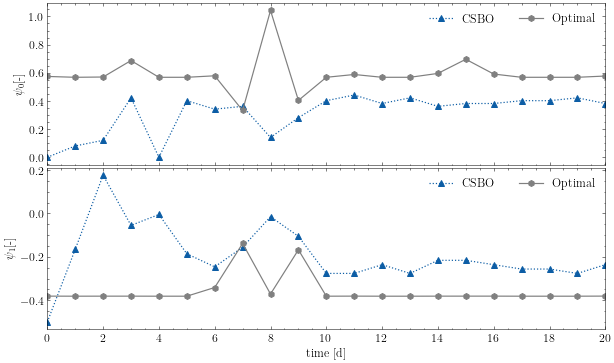

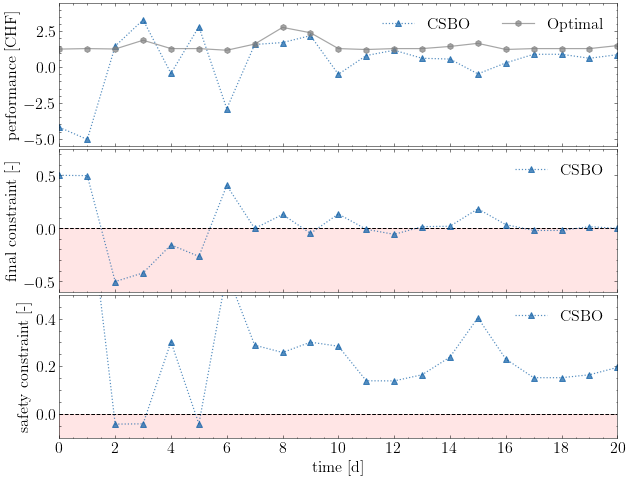

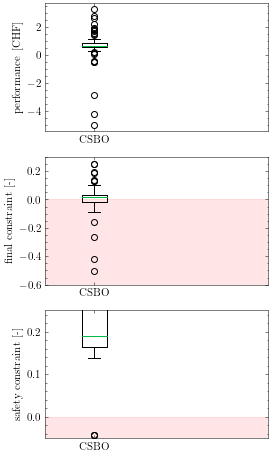

beta: 1 par_num 2


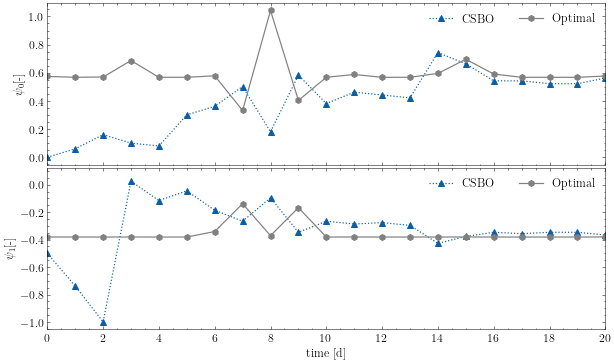

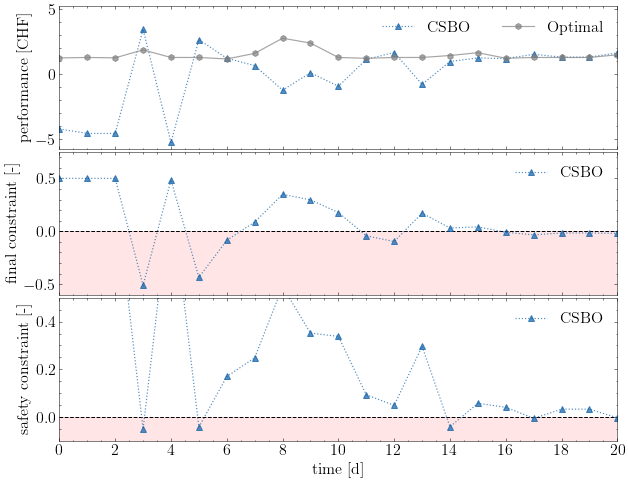

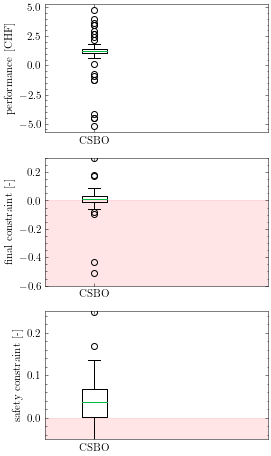

beta: 2 par_num 2


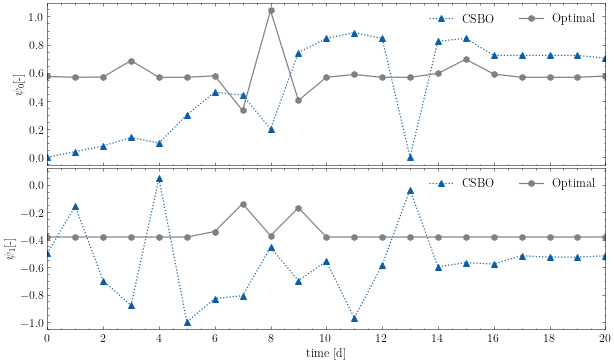

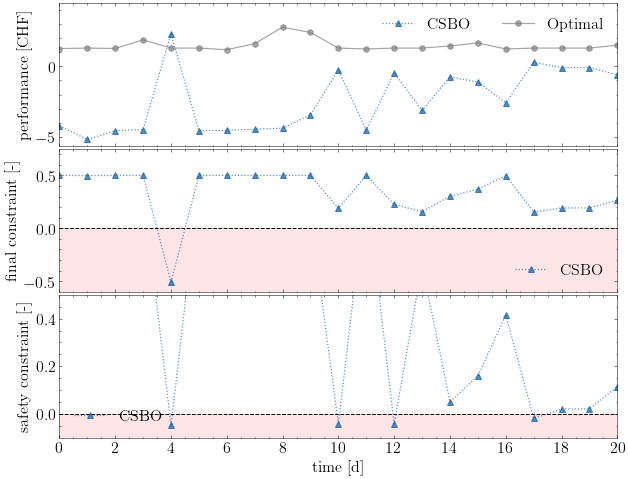

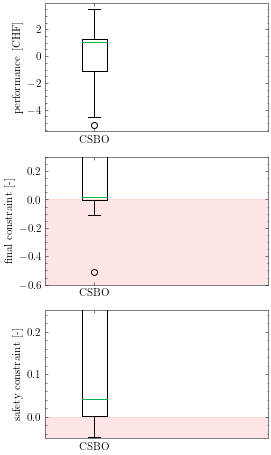

0.5
1
2
False
['1', '0.5', '2']
[1.0, 0.5, 2.0]
False
beta: 0.5 par_num 3


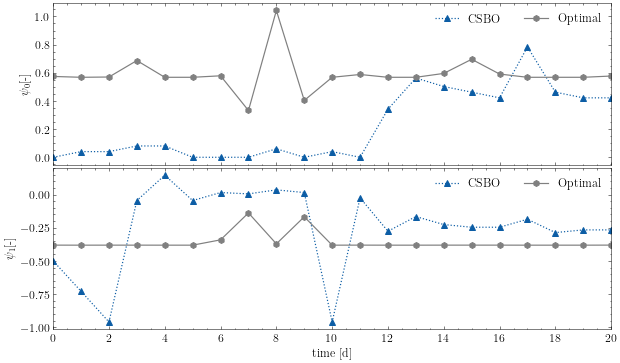

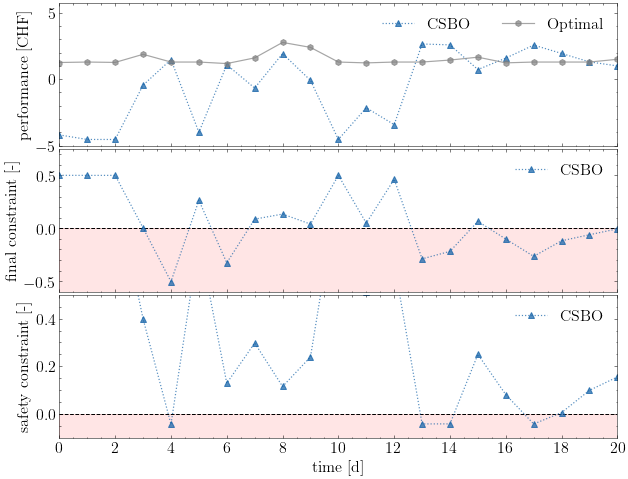

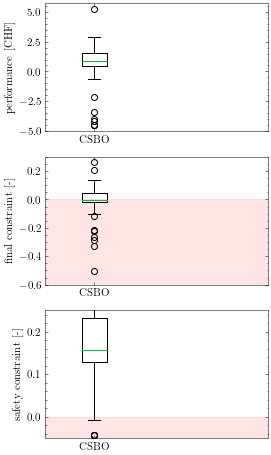

beta: 1 par_num 3


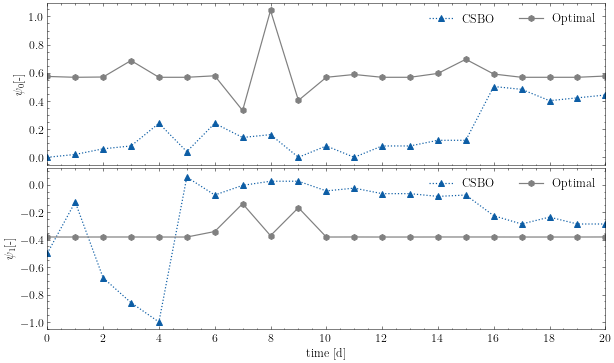

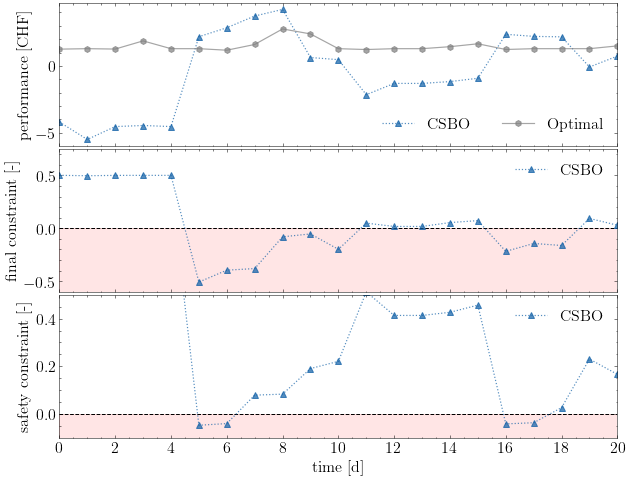

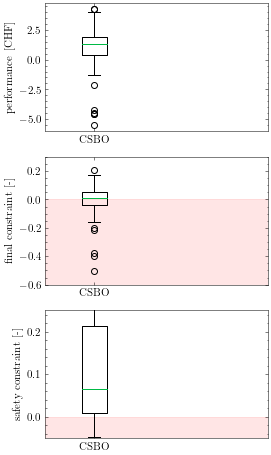

beta: 2 par_num 3


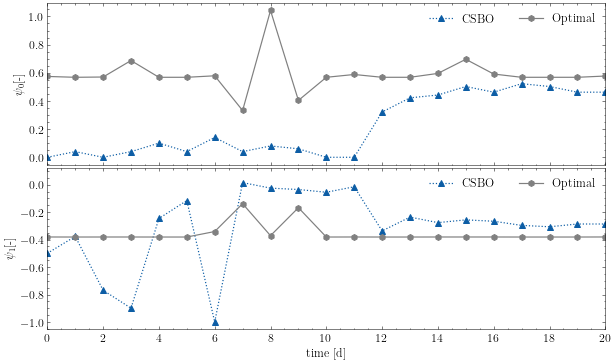

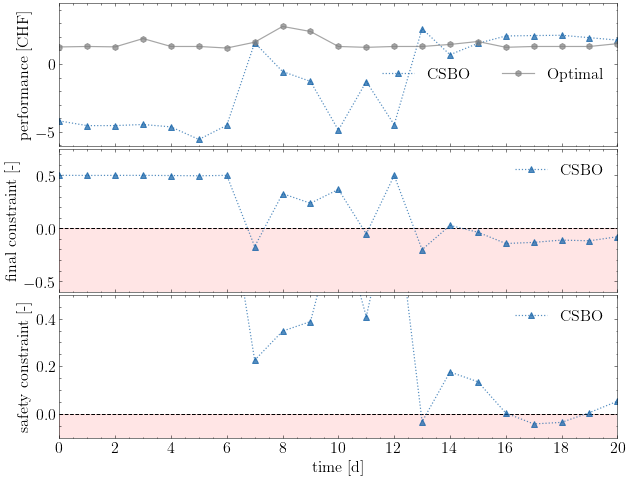

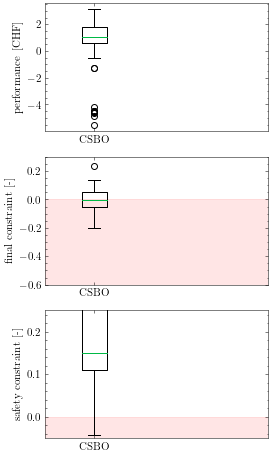

2
1
0.5
False
['0.5', '2', '1']
[0.5, 2.0, 1.0]
False
beta: 0.5 par_num 4


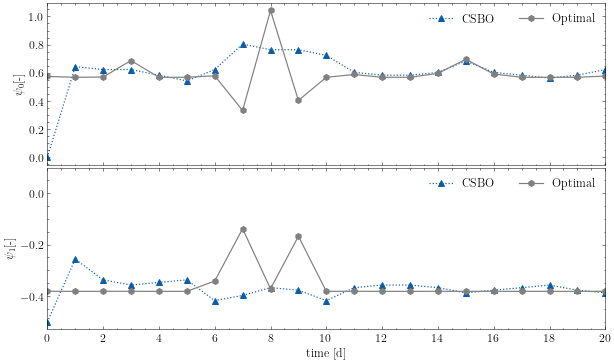

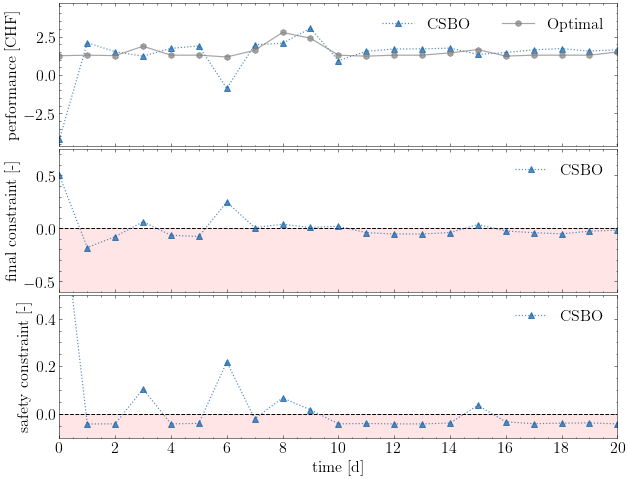

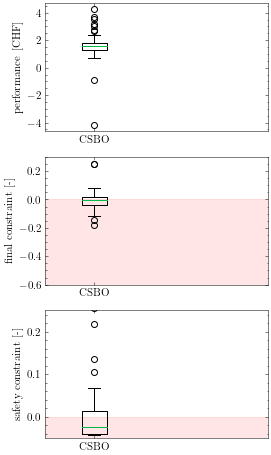

beta: 1 par_num 4


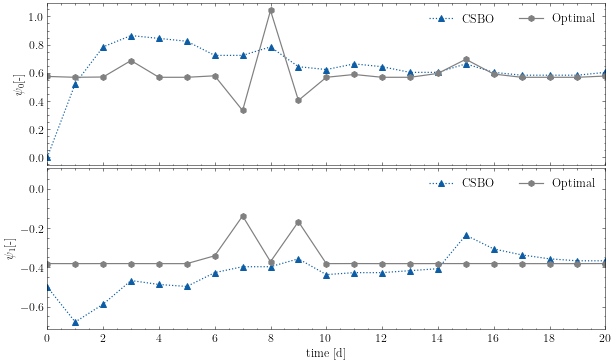

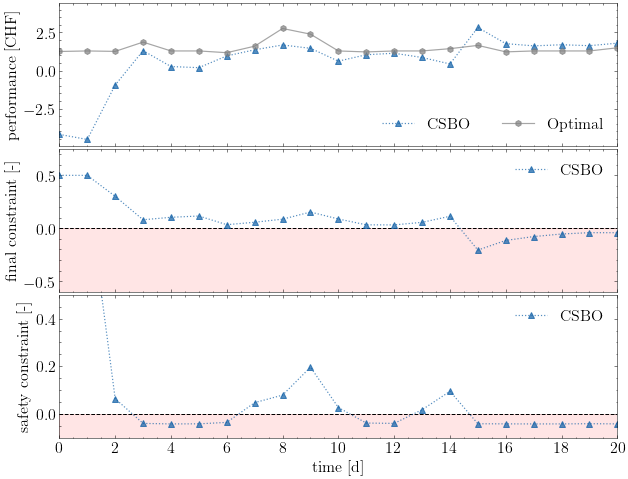

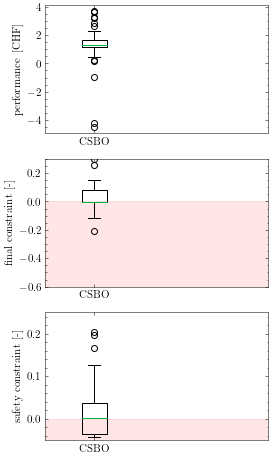

beta: 2 par_num 4


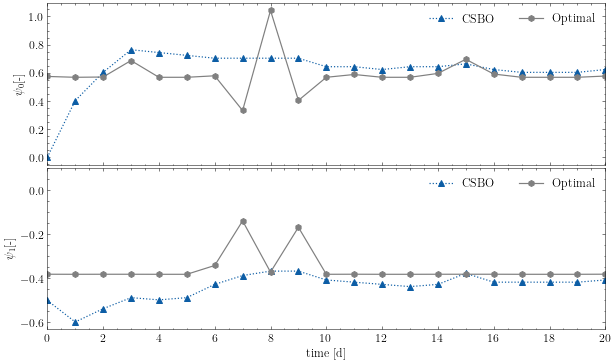

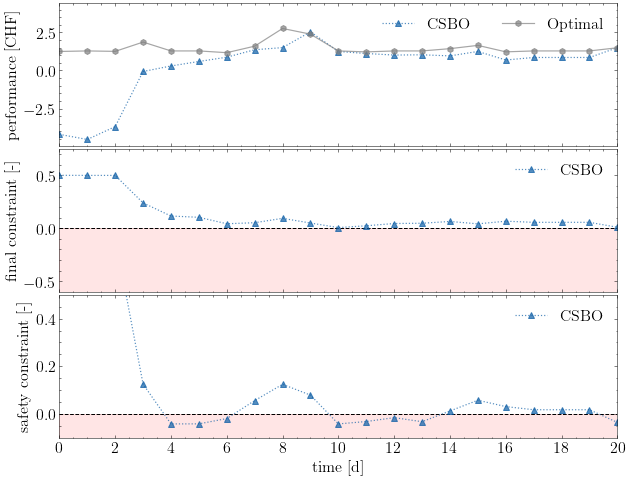

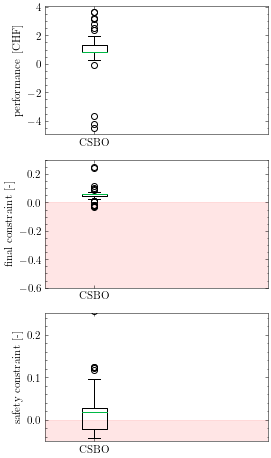

In [82]:
hp_list=[1,2,3,4]
tlim=20
fontsize=16
fontsize2=12
height2=6
height=8
x0=[0.,-0.5]
y0=[-4.2,0.5,0.96]
violations=[]
figfolder='QsQexactfFc'
for n in hp_list:
    import glob
    paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_exactfc/x_post_loglike{n}*')
    file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
    betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
    for i, beta in enumerate(betas):
        print(beta)
        if beta.startswith('0.'):
            betas[i]=float(beta.replace('0.','.'))
        elif beta.startswith('0'):
            betas[i]=float(beta.replace('0','.'))  
        else:
            betas[i]=float(beta) # convert to float and add . to 05

    optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
    dates=[file_path[-19:-4] for file_path in file_paths] # get betas

    par=[]
    for i,path in enumerate(paths):
        foo=np.delete(get_data(path),violations,axis=0)
        foo[0,:]=x0
        par.append(foo)
#     par=np.delete(par,violations)
    par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
    par_df=par_df.set_index(['beta','optype']).sort_index()
    print(np.any(par_df.index.duplicated()))
    par_df=par_df[~par_df.index.duplicated()]

    paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_exactfc/y_post_loglike{n}*')
    file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
    betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
    print(betas)
    for i, beta in enumerate(betas):
        if beta.startswith('0.'):
            betas[i]=float(beta.replace('0.','.'))
        elif beta.startswith('0'):
            betas[i]=float(beta.replace('0','.'))  
        else:
            betas[i]=float(beta) # convert to float and add . to 05

    optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
    dates=[file_path[-19:-4] for file_path in file_paths] # get betas
    print(betas)
    ct=10 #convergence time
    mae_=[]
    mae=[]
    cnst10=[]
    cnst0=[]
    cnst20=[]
    cnst15=[]
    cnst5=[]
    cts=[]
    cnst_hist=[]
    cnst_=[]
    sft_=[]
    cst_=[]
    for i,path in enumerate(paths):
        foo=np.delete(get_data(path),violations,axis=0)
        foo[0,:]=y0
        cst=foo
        cst_.append(cst)
        err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
        mae_.append(np.abs(err))
        mae.append(np.abs(err).sum()/(len(cst)-ct))   
        cnst=get_data(path)[:,1]
        sft=get_data(path)[:,2]        
        cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
        cnst10.append((cnst<-2e-2).astype(int).sum())
        cnst[cnst>0]=0
        cnst_.append(-cnst*50)
        sft[sft>0]=0
        sft_.append(-sft*50)        


    eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'cst_':cst_,'mae':mae,'mae_':mae_,'hst':cnst_hist,'date':dates,
                         'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_})
    eval_df=eval_df.set_index(['beta','optype']).sort_index()
    print(np.any(eval_df.index.duplicated()))
    eval_df=eval_df[~eval_df.index.duplicated()]
    betas_list=[0.5,1,2]
    for beta in betas_list:
        print('beta:',beta,'par_num',n)
        model_label=['CSBO']
        marker=['^']
        #Parameter plot
        with plt.style.context('science'):
            plt.rcParams.update({'font.size': fontsize2})                        
            err=25e-2
            iterations=len(par_df.loc[(beta,'CSBO'),'par'][:,0])
            fig,ax=plt.subplots(2,sharex=True,figsize=(10,height2))
            for col,m in zip(model_label[:],marker[:]):
                ax[0].plot(range(iterations),par_df.loc[(beta,col),'par'][:,0],f':{m}',label=col,linewidth=1.2)
                ax[1].plot(range(iterations),par_df.loc[(beta,col),'par'][:,1],f':{m}',label=col,linewidth=1.2)
            ax[0].plot(range(iterations),rnd_opt_par[:iterations,0],'-h',label='Optimal',linewidth=1.2,color='grey')
            ax[1].plot(range(iterations),rnd_opt_par[:iterations,1],'-h',label='Optimal',linewidth=1.2,color='grey')
            ax[0].set_xticks(np.arange(0,iterations,2))
#             ax[0].set_ylim([0,1.1])
#             ax[1].set_ylim([-0.65,0.1])
            ax[0].set_ylabel(r'$\psi_0$[-]')
            ax[0].legend(ncol=3)    
            ax[1].set_ylabel(r'$\psi_1$[-]')
            ax[1].legend(ncol=3)

            plt.xlabel('time [d]')
            plt.xlim([0,tlim])
            plt.subplots_adjust(hspace=0.02)
            plt.savefig(f'{figfolder}/{n}_par_rp_b0_qs_32_qf_55_beta_{beta}.pdf')
            plt.show()
        # Performance and constraint plots    
        with plt.style.context('science'):
            err=25e-2
            plt.rcParams.update({'font.size': fontsize})            
            iterations=len(par_df.loc[(beta,'CSBO'),'par'][:,0])
            fig,ax=plt.subplots(3,sharex=True,figsize=(10,height))
            for col,m in zip(model_label,marker):
                ax[0].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,0],f':{m}',label=col,linewidth=1.2,alpha=0.7)
                ax[1].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,1],f':{m}',label=col,linewidth=1.2,alpha=0.7)
                ax[2].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,2],f':{m}',label=col,linewidth=1.2,alpha=0.7)
            ax[0].plot(range(iterations),-rnd_opt_cst[:iterations,0],'-h',label='Optimal',linewidth=1.2,color='grey',alpha=0.7)
            ax[1].hlines(0,0,iterations,'k',linestyles='--')
            ax[1].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)
            ax[2].hlines(0,0,iterations,'k',linestyles='--')
            ax[2].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)            
        #     ax[1].plot(range(iterations),rnd_opt_cst[:iterations,1],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[0].set_xticks(np.arange(0,iterations,2))
            ax[0].set_ylabel(r'performance [CHF]')
            ax[0].legend(ncol=4)    
#             ax[0].set_ylim([-5,6.2])            
            ax[1].set_ylim([-0.6,0.75])
            ax[2].set_ylim([-0.1,.5])            
            ax[1].set_ylabel(r'final constraint [-]')
            ax[1].legend(ncol=3)
            ax[2].set_ylabel(r'safety constraint [-]')    
            ax[2].legend(ncol=3)

            plt.xlabel('time [d]')
            plt.xlim([0,tlim])
            plt.subplots_adjust(hspace=0.02)
            plt.savefig(f'{figfolder}/{n}_prf_rp_b0_qs_32_qf_55_beta_{beta}.pdf')
            plt.show()
        model_label=[ 'CSBO']
        model_names=[  'CSBO']
        # MAE and violation boxplots
        with plt.style.context('science'):
            plt.rcParams.update({'font.size': 11})            
            fig,ax=plt.subplots(3,1,figsize=(4,height))
            for i,col in enumerate(model_label): 
                ax[0].boxplot(eval_df.loc[(beta,col)].cst_[:,0],showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[0].set_ylabel(r'performance [CHF]')
                ax[0].set_xlim([-0.2,0.7]) 
                ax[1].boxplot(eval_df.loc[(beta,col)].cst_[:,1],showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[1].set_ylabel(r'final constraint [-]')
                ax[1].set_xlim([-0.2,0.7]) 
                ax[1].set_ylim([-0.6,0.3])                 
                ax[2].boxplot(eval_df.loc[(beta,col)].cst_[:,2],showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[2].set_ylabel(r'safety constraint [-]')     
                ax[2].set_xlim([-0.2,0.7]) 
                ax[2].set_ylim([-0.05,0.25])                  
#                 plt.ylim([-0.001,None])
    #             plt.yscale('log')
            #     plt.ylabel(r'$\textrm{R}^2$')
    #         plt.locator_params(axis="y", nbins=5) 
    #         plt.margins(tight=True)  
        #     plt.legend(['beta'])
            ax[1].fill_between(np.arange(-1,2),y1=0,y2=-2,color='red',alpha=0.1)
            ax[2].fill_between(np.arange(-1,2),y1=0,y2=-2,color='red',alpha=0.1)   
            plt.savefig(f'{figfolder}/{n}_mae_qs_qf_boxplot_beta_{beta}.pdf')
            plt.show()

# All HP tested exact FC

In [77]:
hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_exactfc/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_exactfc/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cstavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
#     cnst[cnst>0]=0
    cnst_.append(cnst)
    cnstavg.append(cnst.mean())
#     sft[sft>0]=0
    sft_.append(sft) 
    sftavg.append(sft.mean())
    cstavg.append(cst[:,0].mean())


eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst':cstavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df=eval_df.set_index(['beta','optype']).sort_index()
print(np.any(eval_df.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]


True
True


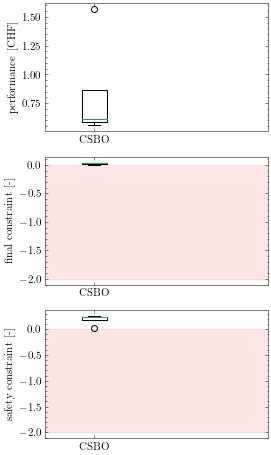

0.5


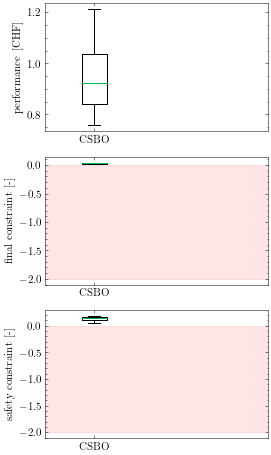

1


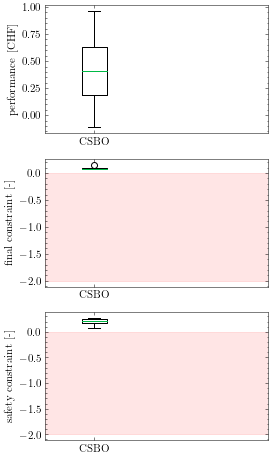

2


In [78]:
model_label=[ 'CSBO']
model_names=[ 'CSBO']
for beta in [0.5,1,2]:
    with plt.style.context('science'):
        plt.rcParams.update({'font.size': 11})            
        fig,ax=plt.subplots(3,1,figsize=(4,height))
        for i,col in enumerate(model_label): 
            ax[0].boxplot(eval_df.loc[(beta,col)].cst,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
            ax[0].set_ylabel(r'performance [CHF]')
            ax[0].set_xlim([-0.2,0.7]) 
            ax[1].boxplot(eval_df.loc[(beta,col)].cnst,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
            ax[1].set_ylabel(r'final constraint [-]')
            ax[1].set_xlim([-0.2,0.7]) 
#             ax[1].set_ylim([-0.6,0.3])                 
            ax[2].boxplot(eval_df.loc[(beta,col)].sft,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
            ax[2].set_ylabel(r'safety constraint [-]')     
            ax[2].set_xlim([-0.2,0.7]) 
#             ax[2].set_ylim([-0.05,0.25])                  
#                 plt.ylim([-0.001,None])
#             plt.yscale('log')
        #     plt.ylabel(r'$\textrm{R}^2$')
#         plt.locator_params(axis="y", nbins=5) 
#         plt.margins(tight=True)  
    #     plt.legend(['beta'])
        ax[1].fill_between(np.arange(-1,2),y1=0,y2=-2,color='red',alpha=0.1)
        ax[2].fill_between(np.arange(-1,2),y1=0,y2=-2,color='red',alpha=0.1)   
#         plt.savefig(f'{figfolder}/{n}_mae_qs_qf_boxplot_beta_{beta}.pdf')
        plt.show()
    print(beta)
   

# Context sensitibity

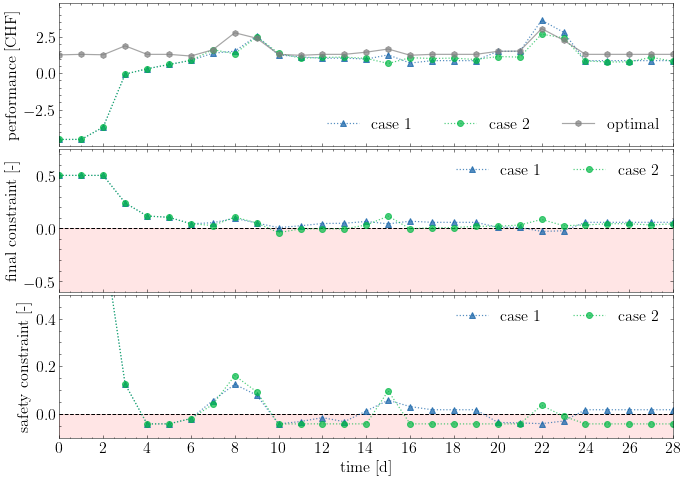

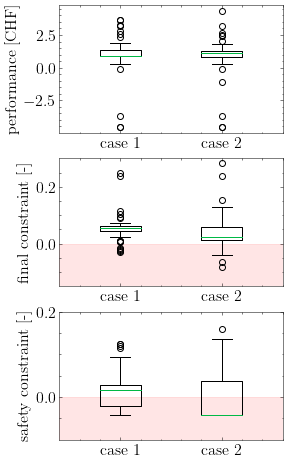

In [41]:
perf0=get_data('sim_data_312_winter_rp0_qf_55_qs_32_exactfc/y_post_loglike4_b2_CSBO_2022_05_15_0051.npy')
perf1=get_data('sim_data_312_winter_rp0_qf_55_qs_32_modelfc/y_post_loglike4_b2_CSBO_2022_04_01_0151.npy')
beta=2
n=4
perf=[perf0,perf1]
tlim=28
fontsize=16
figfolder='ctxt_sens'
# Performance and constraint plots        
with plt.style.context('science'):
    err=25e-2
    plt.rcParams.update({'font.size': fontsize})            
    iterations=len(perf0[:,0])
    fig,ax=plt.subplots(3,sharex=True,figsize=(11,height))
    marker=['^','o']
    labels=['case 1','case 2']
    for df,m,col in zip(perf,marker,labels):
        ax[0].plot(range(iterations),df[:,0],f':{m}',label=col,linewidth=1.2,alpha=0.7)
        ax[1].plot(range(iterations),df[:,1],f':{m}',label=col,linewidth=1.2,alpha=0.7)
        ax[2].plot(range(iterations),df[:,2],f':{m}',label=col,linewidth=1.2,alpha=0.7)
    ax[0].plot(range(iterations),-rnd_opt_cst[:iterations,0],'-h',label='optimal',linewidth=1.2,color='grey',alpha=0.7)
    ax[1].hlines(0,0,iterations,'k',linestyles='--')
    ax[1].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)
    ax[2].hlines(0,0,iterations,'k',linestyles='--')
    ax[2].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)            
#     ax[1].plot(range(iterations),rnd_opt_cst[:iterations,1],':h',label='Optimal',linewidth=1.2,color='grey')
    ax[0].set_xticks(np.arange(0,iterations,2))
    ax[0].set_ylabel(r'performance [CHF]')
    ax[0].legend(ncol=4)    
#             ax[0].set_ylim([-5,6.2])            
    ax[1].set_ylim([-0.6,0.75])
    ax[2].set_ylim([-0.1,.5])            
    ax[1].set_ylabel(r'final constraint [-]')
    ax[1].legend(ncol=3)
    ax[2].set_ylabel(r'safety constraint [-]')    
    ax[2].legend(ncol=3)

    plt.xlabel('time [d]')
    plt.xlim([0,tlim])
    plt.subplots_adjust(hspace=0.02)
    plt.savefig(f'{figfolder}/{n}_prf_rp_b0_qs_32_qf_55_beta_{beta}.pdf')
    plt.show()
    
# Boxplots

    plt.rcParams.update({'font.size': fontsize})            
    fig,ax=plt.subplots(3,1,figsize=(4,height))
    for df,label,i in zip(perf,labels,range(len(label))):
        ax[0].boxplot(df[:,0],showfliers=True,labels=[label],positions=[i/4],widths=0.1)
        ax[0].set_ylabel(r'performance [CHF]')
        ax[0].set_xlim([-0.15,0.4]) 
        ax[1].boxplot(df[:,1],showfliers=True,labels=[label],positions=[i/4],widths=0.1)
        ax[1].set_ylabel(r'final constraint [-]')
        ax[1].set_xlim([-0.15,0.4]) 
        ax[1].set_ylim([-0.15,0.3])                 
        ax[2].boxplot(df[:,2],showfliers=True,labels=[label],positions=[i/4],widths=0.1)
        ax[2].set_ylabel(r'safety constraint [-]')     
        ax[2].set_xlim([-0.15,0.4]) 
        ax[2].set_ylim([-0.1,0.2])                  
#                 plt.ylim([-0.001,None])
#             plt.yscale('log')
    #     plt.ylabel(r'$\textrm{R}^2$')
#         plt.locator_params(axis="y", nbins=5) 
#         plt.margins(tight=True)  
#     plt.legend(['beta'])
    ax[1].fill_between(np.arange(-1,2),y1=0,y2=-2,color='red',alpha=0.1)
    ax[2].fill_between(np.arange(-1,2),y1=0,y2=-2,color='red',alpha=0.1) 

    plt.savefig(f'{figfolder}/{n}_qs_qf_boxplot_beta_{beta}.pdf')
    plt.show()

# All HP context sensibility

True
True
True
True


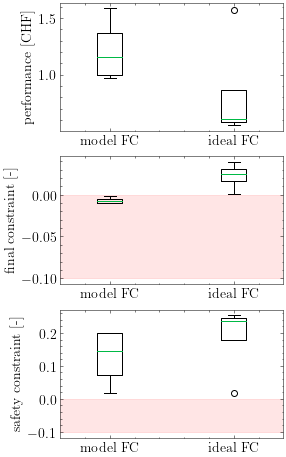

0.5


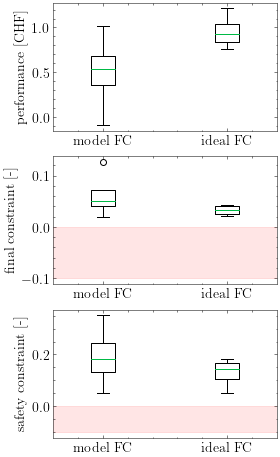

1


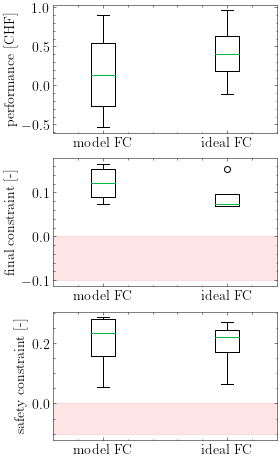

2


In [3]:
            
hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_exactfc/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_exactfc/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cstavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
#     cnst[cnst>0]=0
    cnst_.append(cnst)
    cnstavg.append(cnst.mean())
#     sft[sft>0]=0
    sft_.append(sft) 
    sftavg.append(sft.mean())
    cstavg.append(cst[:,0].mean())


eval_df_=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst':cstavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df_=eval_df_.set_index(['beta','optype']).sort_index()
print(np.any(eval_df_.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]


hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cstavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
#     cnst[cnst>0]=0
    cnst_.append(cnst)
    cnstavg.append(cnst.mean())
#     sft[sft>0]=0
    sft_.append(sft) 
    sftavg.append(sft.mean())
    cstavg.append(cst[:,0].mean())


eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst':cstavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df=eval_df.set_index(['beta','optype']).sort_index()
print(np.any(eval_df.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]

model_label=[ eval_df,eval_df_]
model_names=[ 'model FC','ideal FC']

for beta in [0.5,1,2]:
    with plt.style.context('science'):
        plt.rcParams.update({'font.size': 14})            
        fig,ax=plt.subplots(3,1,figsize=(4,height))
        col='CSBO'
        for i,df in enumerate(model_label): 
            ax[0].boxplot(df.loc[(beta,col)].cst,showfliers=True,labels=[model_names[i]],positions=[i/2],widths=0.1)
            ax[0].set_ylabel(r'performance [CHF]')
            ax[0].set_xlim([-0.2,0.7]) 
            ax[1].boxplot(df.loc[(beta,col)].cnst,showfliers=True,labels=[model_names[i]],positions=[i/2],widths=0.1)
            ax[1].set_ylabel(r'final constraint [-]')
            ax[1].set_xlim([-0.2,0.7]) 
#             ax[1].set_ylim([-0.6,0.3])                 
            ax[2].boxplot(df.loc[(beta,col)].sft,showfliers=True,labels=[model_names[i]],positions=[i/2],widths=0.1)
            ax[2].set_ylabel(r'safety constraint [-]')     
            ax[2].set_xlim([-0.2,0.7]) 
#             ax[2].set_ylim([-0.05,0.25])                  
#                 plt.ylim([-0.001,None])
#             plt.yscale('log')
        #     plt.ylabel(r'$\textrm{R}^2$')
#         plt.locator_params(axis="y", nbins=5) 
#         plt.margins(tight=True)  
    #     plt.legend(['beta'])
        ax[1].fill_between(np.arange(-1,2),y1=0,y2=-0.1,color='red',alpha=0.1)
        ax[2].fill_between(np.arange(-1,2),y1=0,y2=-0.1,color='red',alpha=0.1)   
#         plt.savefig(f'{figfolder}/{n}_mae_qs_qf_boxplot_beta_{beta}.pdf')
        plt.show()
    print(beta)

True
True
True
True


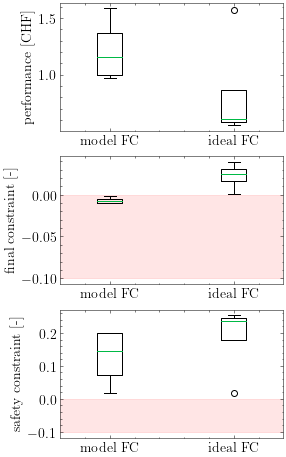

0.5


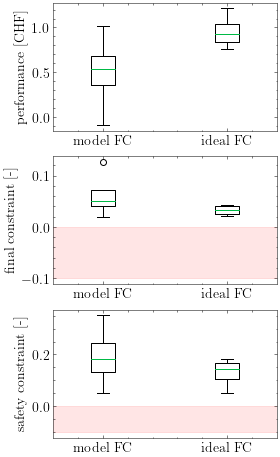

1


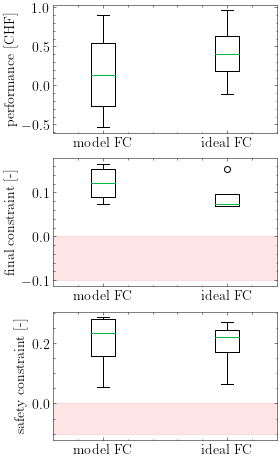

2


In [76]:
hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_exactfc/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_exactfc/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cstavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
#     cnst[cnst>0]=0
    cnst_.append(cnst)
    cnstavg.append(cnst.mean())
#     sft[sft>0]=0
    sft_.append(sft) 
    sftavg.append(sft.mean())
    cstavg.append(cst[:,0].mean())


eval_df_=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst':cstavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df_=eval_df_.set_index(['beta','optype']).sort_index()
print(np.any(eval_df_.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]


hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cstavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
#     cnst[cnst>0]=0
    cnst_.append(cnst)
    cnstavg.append(cnst.mean())
#     sft[sft>0]=0
    sft_.append(sft) 
    sftavg.append(sft.mean())
    cstavg.append(cst[:,0].mean())


eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst':cstavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df=eval_df.set_index(['beta','optype']).sort_index()
print(np.any(eval_df.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]

model_label=[ eval_df,eval_df_]
model_names=[ 'model FC','ideal FC']
for beta in [0.5,1,2]:
    with plt.style.context('science'):
        plt.rcParams.update({'font.size': 14})            
        fig,ax=plt.subplots(3,1,figsize=(4,height))
        for i,df in enumerate(model_label): 
            ax[0].boxplot(df.loc[(beta,col)].cst,showfliers=True,labels=[model_names[i]],positions=[i/2],widths=0.1)
            ax[0].set_ylabel(r'performance [CHF]')
            ax[0].set_xlim([-0.2,0.7]) 
            ax[1].boxplot(df.loc[(beta,col)].cnst,showfliers=True,labels=[model_names[i]],positions=[i/2],widths=0.1)
            ax[1].set_ylabel(r'final constraint [-]')
            ax[1].set_xlim([-0.2,0.7]) 
#             ax[1].set_ylim([-0.6,0.3])                 
            ax[2].boxplot(df.loc[(beta,col)].sft,showfliers=True,labels=[model_names[i]],positions=[i/2],widths=0.1)
            ax[2].set_ylabel(r'safety constraint [-]')     
            ax[2].set_xlim([-0.2,0.7]) 
#             ax[2].set_ylim([-0.05,0.25])                  
#                 plt.ylim([-0.001,None])
#             plt.yscale('log')
        #     plt.ylabel(r'$\textrm{R}^2$')
#         plt.locator_params(axis="y", nbins=5) 
#         plt.margins(tight=True)  
    #     plt.legend(['beta'])
        ax[1].fill_between(np.arange(-1,2),y1=0,y2=-0.1,color='red',alpha=0.1)
        ax[2].fill_between(np.arange(-1,2),y1=0,y2=-0.1,color='red',alpha=0.1)   
#         plt.savefig(f'{figfolder}/{n}_mae_qs_qf_boxplot_beta_{beta}.pdf')
        plt.show()
    print(beta)

In [54]:
eval_df

mae      cnst       sft       cst  \
beta optype                                           
0.5  CSBO    0.560923 -0.501058 -0.042159  2.293869   
     CSBO    1.844670 -0.170689  0.214284  0.316483   
     CSBO    0.560923 -0.501058 -0.042159  2.293869   
     CSBO    0.560923 -0.501058 -0.042159  2.293869   
1.0  CSBO    0.560923 -0.501058 -0.042159  2.293869   
     CSBO    0.560923 -0.501058 -0.042159  2.293869   
     CSBO    0.560923 -0.501058 -0.042159  2.293869   
     CSBO    0.560923 -0.501058 -0.042159  2.293869   
2.0  CSBO    0.560923 -0.501058 -0.042159  2.293869   
     CSBO    0.560923 -0.501058 -0.042159  2.293869   
     CSBO    0.560923 -0.501058 -0.042159  2.293869   
     CSBO    0.560923 -0.501058 -0.042159  2.293869   

                                                          cst_  \
beta optype                                                      
0.5  CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
1.0  CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
2.0  CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   
     CSBO    [[1.364060037258465, -0.5015203977359035, -0.0...   

                                                          mae_  \
beta optype                                                      
0.5  CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
     CSBO    [1.286894287508915, 1.233473166860473, 1.28686...   
     CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
     CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
1.0  CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
     CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
     CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
     CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
2.0  CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
     CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
     CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   
     CSBO    [0.07858836202132191, 0.16365924417701727, 0.0...   

                                                           hst  \
beta optype                                                      
0.5  CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 4, 0...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1.0  CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2.0  CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                        date  cnst10  \
beta optype                            
0.5  CSBO    2022_05_14_2215      56   
     CSBO    2022_05_14_2211      46   
     CSBO    2022_05_14_2227      56   
     CSBO    2022_05_14_2220      56   
1.0  CSBO    2022_05_14_2222      56   
     CSBO    2022_05_14_2229      56   
     CSBO    2022_05_14_2212      56   
     CSBO    2022_05_14_2217      56   
2.0  CSBO    2022_05_14_2230      56   
     CSBO    2022_05_14_2224    

In [12]:
eval_df.sort_values('mae')

mae       cnst       sft  \
beta optype                                  
0.5  CSBO    0.289095  -1.203868 -1.036670   
     SBO     0.334100  -1.268368 -1.614520   
     CSBO    0.373180  -1.088000 -1.068939   
     CSBO    0.383883  -1.625381  0.000000   
2.0  CSBO    0.396861  -0.492090 -0.466997   
1.0  BO      0.397720 -24.641636 -2.108998   
     BO      0.397720 -24.641636 -2.108998   
0.5  BO      0.402618 -24.647583 -2.109234   
1.0  BO      0.404203 -24.651863 -2.109354   
0.5  BO      0.407907 -24.657374 -2.110496   
     BO      0.407907 -24.657374 -2.110496   
1.0  CSBO    0.552426  -1.157480 -0.309778   
     SBO     0.559936  -1.357614 -1.490405   
     CSBO    0.634196  -1.781284 -0.113114   
2.0  SBO     0.641425  -0.436940 -1.508731   
0.5  CSBO    0.678536  -2.313640 -0.213950   
1.0  CSBO    0.704487  -0.436333 -0.617335   
0.5  SBO     0.706309  -1.081333 -1.586372   
2.0  CSBO    0.706567  -1.000897  0.000000   
0.5  CSBO    0.712439  -2.090261 -0.211711   
2.0  CSBO    0.712837  -1.239314 -0.409012   
0.5  SBO     0.714411  -3.711878  0.000000   
1.0  SBO     0.719361  -2.470726  0.000000   
2.0  BO      0.731240 -21.283679 -2.119730   
     SBO     0.761124  -1.340742 -1.403473   
1.0  CSBO    0.887422  -1.637912  0.000000   
     BO      0.892478 -16.761522  0.000000   
2.0  BO      0.903645 -21.551897 -2.127826   
     BO      0.903645 -21.551897 -2.127826   
     SBO     0.924006  -1.873986  0.000000   
1.0  CSBO    0.963785  -1.907306 -0.238866   
2.0  BO      0.986790 -18.873005 -2.069692   
0.5  BO      1.083467 -22.637272  0.000000   
     SBO     1.112837  -3.832892 -0.298967   
2.0  CSBO    1.118419  -1.865861 -0.244699   
0.5  BO      1.134023 -15.848704 -1.987049   
2.0  BO      1.149455 -18.479234  0.000000   
1.0  BO      1.233377 -19.423077 -2.033871   
0.5  SBO     1.312573  -3.336847 -0.243714   
1.0  SBO     1.369753  -3.790979 -0.340509   
2.0  CSBO    1.476046  -1.067224 -0.068139   
     SBO     1.558657  -2.748777 -0.360292   
     SBO     1.675712  -2.089335 -0.632792   
1.0  SBO     1.958963  -3.664191 -0.160008   
     SBO     2.044619  -3.122871 -0.133930   
     SBOb    2.175857  -0.815269  0.000000   
0.5  SBOb    2.468597  -1.195512  0.000000   
2.0  SBOb    3.293837  -1.078900  0.000000   
0.5  SBOb    4.211727  -2.016102 -0.731850   
     SBOb    4.360261  -2.307504 -0.728391   
1.0  SBOb    4.439495  -1.083604 -0.476252   
     SBOb    4.456233  -2.051231 -0.289083   
0.5  SBOb    4.486604  -0.488646 -0.416961   
1.0  SBOb    4.549135  -1.450716 -0.376900   
0.5  SBOb    4.618919  -0.564032 -0.445772   
2.0  SBOb    4.627866  -0.659921 -0.258988   
     SBOb    4.666411  -0.889764 -0.374969   
     SBOb    4.797815  -0.735356 -0.204964   
1.0  SBOb    4.851308  -1.107812 -0.364007   
2.0  SBOb    4.865492  -0.729364 -0.224427   

                                                          cst_  \
beta optype                                                      
0.5  CSBO    [[-4.509002670493637, 0.49869236627122576, 0.9...   
     SBO     [[-4.509002670493637, 0.49869236627122576, 0.9...   
     CSBO    [[-4.542359627080834, 0.49943966567556347, 0.9...   
     CSBO    [[-4.542108426810266, 0.49935526282657006, 1.0...   
2.0  CSBO    [[-4.540943691007371, 0.4991120858955614, 0.95...   
1.0  BO      [[-1.9735311822432884, 0.4993124462134446, -0....   
     BO      [[-1.9735311822432884, 0.4993124462134446, -0....   
0.5  BO      [[-1.9628737928844862, 0.4993123681134861, -0....   
1.0  BO      [[-1.9521919327661443, 0.49931236000508616, -0...   
0.5  BO      [[-1.9735356572332252, 0.4993124524395051, -0....   
     BO      [[-1.9735356572332252, 0.4993124524395051, -0....   
1.0  CSBO    [[-4.5620112359632135, 0.4984318642861601, 0.9...   
     SBO     [[-4.540732009307701, 0.49921563131164903, 0.9...   
     CSBO    [[-4.659192294246759, 0.49786153383114196, 0.9...   
2.0  SBO     [[-4.540943691007371, 0.4991120858955614, 0.95...   
0.5  CSBO    [[-4.637237801448587, 0.498190

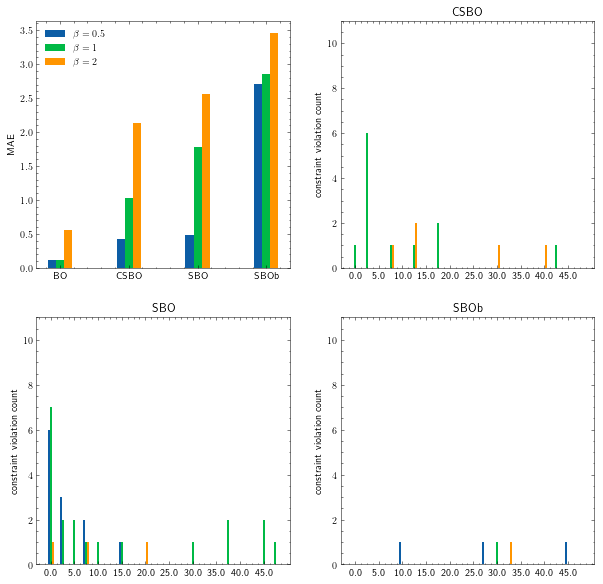

In [149]:
with plt.style.context('science'):
    x = np.arange(len(eval_df.index.levels[1]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(2,2,figsize=(10,10))
    rects1 = axes[0,0].bar(x - width/3, eval_df.loc[0.5].mae, width/3, label=r'$\beta=0.5$')
    rects2 = axes[0,0].bar(x , eval_df.loc[1].mae, width/3, label=r'$\beta=1$',tick_label=eval_df.index.levels[1])
    rects3 = axes[0,0].bar(x + width/3, eval_df.loc[2].mae, width/3, label=r'$\beta=2$')
    axes[0,0].set_ylabel('MAE')
    axes[0,0].legend()
    n_bins=20
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    for i,ax in enumerate(axes.flatten()[1:]):
        width=0.5
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round(1)[::-1])
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=2$')
        ax.set_xticks(np.arange(0,n_bins,2))
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('constraint violation count')
        ax.set_ylim([0,11])
        ax.set_title(op)
    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

#     fig.tight_layout()
#     axes[1,1].set_xlim([10,30])
# plt.savefig('../fig_scripts/eval_mae_cnstviol_rp_qf55_loglike3_.png')
plt.show()

In [9]:
hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_modelfc/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
    cnst[cnst>0]=0
    cnst_.append(-cnst*50)
    cnstavg.append(cnst.mean()*50)
    sft[sft>0]=0
    sft_.append(-sft*50) 
    sftavg.append(sft.mean()*50)


eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df=eval_df.set_index(['beta','optype']).sort_index()
print(np.any(eval_df.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]


True
True


In [14]:
eval_df.sort_values('cnst')

mae       cnst       sft  \
beta optype                                  
0.5  BO      0.567615 -24.618724 -2.107780   
     BO      0.564168 -24.614326 -2.106332   
     BO      0.564168 -24.614326 -2.106332   
1.0  BO      0.564792 -24.613194 -2.107877   
     BO      0.564792 -24.613194 -2.107877   
     BO      0.561257 -24.607817 -2.106186   
2.0  BO      0.694994 -22.701689 -2.097089   
0.5  BO      1.362740 -21.338894 -2.081538   
2.0  BO      1.183990 -19.738869 -2.118934   
     BO      1.183990 -19.738869 -2.118934   
1.0  BO      1.393079 -19.580567 -2.053917   
2.0  BO      0.843861 -19.558641 -2.117550   
0.5  SBO     1.277891  -5.268332 -0.566284   
1.0  SBO     1.337796  -4.850943 -0.275659   
     SBO     1.228273  -4.349365 -0.691187   
0.5  SBO     1.174854  -4.177789 -0.229536   
     CSBO    1.059349  -4.067802 -0.293098   
     CSBO    1.018878  -3.987103 -0.278012   
1.0  SBO     0.945516  -3.790680 -1.158596   
0.5  SBO     1.272065  -3.790184 -0.201246   
     CSBO    0.729798  -3.714927 -1.203543   
1.0  CSBO    0.981737  -3.507889 -0.847183   
     CSBO    1.613063  -3.298931 -0.176578   
2.0  SBO     2.997431  -2.901312 -0.118494   
1.0  CSBO    1.102882  -2.579820 -0.763654   
0.5  SBOb    4.145484  -2.378551 -0.658962   
     CSBO    0.484471  -2.101452 -1.489103   
     SBO     0.459104  -1.993636 -1.490749   
2.0  CSBO    0.891463  -1.938499 -0.899205   
0.5  SBOb    4.325706  -1.760686 -0.536314   
1.0  SBOb    4.433735  -1.734736 -0.332067   
2.0  CSBO    1.542190  -1.729760 -0.903001   
0.5  SBOb    4.271842  -1.342717 -0.509386   
2.0  SBO     1.689107  -1.288778 -0.883491   
1.0  SBOb    4.567646  -1.247064 -0.349116   
     SBOb    4.619985  -0.988114 -0.374035   
2.0  SBOb    4.457847  -0.951704 -0.425249   
     SBOb    4.349868  -0.914208 -0.196663   
     SBOb    4.852771  -0.863385 -0.230735   
1.0  SBOb    4.834883  -0.857641 -0.299581   
2.0  SBO     0.465738  -0.822679 -1.383479   
     SBOb    4.727771  -0.715227 -0.278960   
     CSBO    1.694779  -0.666302 -0.728430   
0.5  SBOb    4.594955  -0.540539 -0.282251   
2.0  CSBO    0.511538  -0.231641 -1.356352   
     SBO     0.679668  -0.211858 -1.437038   
1.0  CSBO    0.951915  -0.135513 -1.336841   
     SBO     1.316867   0.000000 -1.537590   

                                                          cst_  \
beta optype                                                      
0.5  BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
     BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
     BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
1.0  BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
     BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
     BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
2.0  BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
0.5  BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
2.0  BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
     BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
1.0  BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
2.0  BO      [[-1.6608257534532305, 0.49930965295239216, -0...   
0.5  SBO     [[-4.542359627080834, 0.49943966567556347, 0.9...   
1.0  SBO     [[-4.5620112359632135, 0.4984318642861601, 0.9...   
     SBO     [[-4.659192294246759, 0.49786153383114196, 0.9...   
0.5  SBO     [[-4.637237801448587, 0.4981902378702307, 0.95...   
     CSBO    [[-4.637237801448587, 0.4981902378702307, 0.95...   
     CSBO    [[-4.637237801448587, 0.4981902378702307, 0.95...   
1.0  SBO     [[-4.5620112359632135, 0.4984318642861601, 0.9...   
0.5  SBO     [[-4.637237801448587, 0.4981902378702307, 0.95...   
     CSBO    [[-4.542359627080834, 0.49943966567556347, 0.9...   
1.0  CSBO    [[-4.659192294246759, 0.49786153383114196, 0.9...   
     CSBO    [[-4.5620112359632135, 0.4984318642861601, 0.9...   
2.0  SBO     [[-4.542364839002397, 0.4992529666803898, 0.95...   
1

In [ ]:
with plt.style.context('science'):
    x = np.arange(len(eval_df.index.levels[1]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(1,3,figsize=(15,5))
    rects1 = axes[0].bar(x - width/3, eval_df.loc[0.5].mae, width/3, label=r'$\beta=0.5$')
    rects2 = axes[0].bar(x , eval_df.loc[1].mae, width/3, label=r'$\beta=1$',tick_label=eval_df.index.levels[1])
    rects3 = axes[0].bar(x + width/3, eval_df.loc[2].mae, width/3, label=r'$\beta=2$')
    axes[0].set_ylabel('MAE')
    axes[0].legend()
    axes[0].set_xlabel('optimizer')

    n_bins=10
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    for i,ax in enumerate(axes.flatten()[1:]):
        width=0.5
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round().astype(int)[::-1])
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=2$')
        ax.set_xticks(np.arange(0,n_bins,2))
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('constraint violation count')
        ax.set_ylim([0,11])
        ax.set_title(op)
        ax.set_xlabel('bin [\%]')

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

#     fig.tight_layout()
#     axes[1,1].set_xlim([10,30])
# plt.savefig('../fig_scripts/eval_mae_cnstviol_rp_qf55_loglike3.png')
plt.show()

In [ ]:
with plt.style.context('science'):
    n_bins=20
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(3,figsize=(5,5))
    for i,ax in enumerate(axes.flatten()):
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round(1))
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:], width/3, label=r'$\beta=2$')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('count')
        ax.set_title(op)
        # ax.set_xticks(eval_df.index.levels[1].values)
        ax.legend()

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

    fig.tight_layout()

plt.show()

In [129]:
eval_df.index.levels[1]

Index(['BO', 'CSBO', 'SBO', 'SBOb'], dtype='object', name='optype')

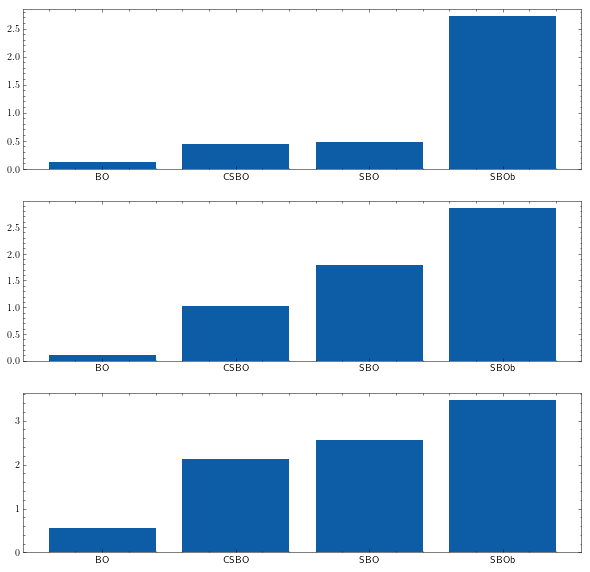

In [103]:
with plt.style.context('science'):
    fig,axes=plt.subplots(len(eval_df.index.levels[0]),figsize=(10,10))
    for i,ax in enumerate(axes.flatten()):
        df=eval_df.loc[eval_df.index.levels[0][i]]
        ax.bar(df.index,df.mae)

plt.show()

# GP evaluation

In [3]:
gps_b2=get_data('sim_data_312_winter_rp0_qf_55/CSBO_loglike3_b2__2022_03_08_0450')
gps_b05=get_data('sim_data_312_winter_rp0_qf_55/CSBO_loglike3_b05__2022_03_08_044')
bounds = [(0., 4.),(-1,1)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 100) 
optb2=safeopt.SafeOpt(gps_b2[1],parameter_set,fmin=0,num_contexts=1)
optb05=safeopt.SafeOpt(gps_b05[1],parameter_set,fmin=0,num_contexts=1)

This is local package in rbc-parameter-tuning
This is local package in rbc-parameter-tuning


3 3 1
context_fixed_inputs:  [(2, 0.0)]
3 3 1
context_fixed_inputs:  [(2, 1.0)]
3 3 1
context_fixed_inputs:  [(2, 0.0)]
3 3 1
context_fixed_inputs:  [(2, 1.0)]


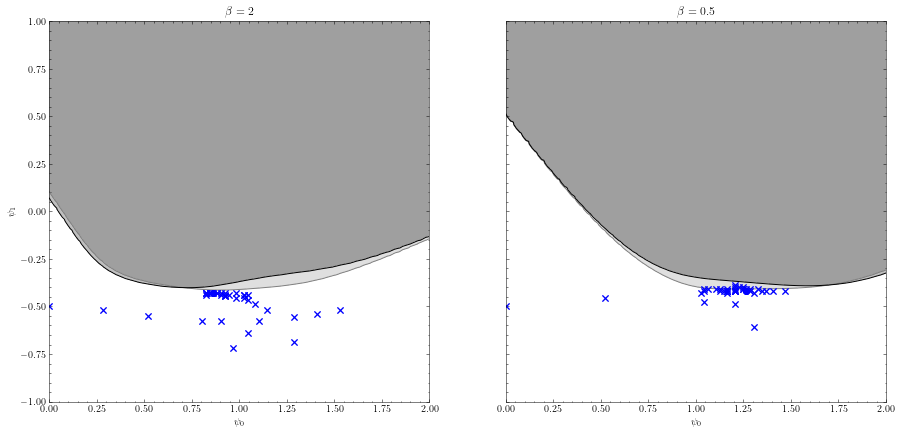

In [91]:
with plt.style.context('science'):
    fig,ax=plt.subplots(1,2,figsize=(15,7),sharey=True)
    optb2.context=[[0]]
    optb2.plot(100,levels=[-1,0,1],figure=fig,axis=ax[0], colors='grey',colorbar=False)
    optb2.context=[[1]]
    optb2.plot(100,levels=[-1,0,1],figure=fig,axis=ax[0],colors='black',colorbar=False)
    optb05.context=[[0]]
    optb05.plot(100,levels=[-1,0,1],figure=fig,axis=ax[1], colors='grey',colorbar=False)
    optb05.context=[[1]]
    optb05.plot(100,levels=[-1,0,1],figure=fig,axis=ax[1],colors='black',colorbar=False)
    ax[0].set_xlim([0,2])
    ax[1].set_xlim([0,2])
    ax[0].set_title(r'$\beta =2$')
    ax[1].set_title(r'$\beta =0.5$')
    ax[0].set_xlabel(r'$\psi_{0}$')
    ax[0].set_ylabel(r'$\psi_{1}$')    
    ax[1].set_xlabel(r'$\psi_{0}$')
    ax[1].set_title(r'$\beta =0.5$')
plt.savefig('../fig_scripts/qf_const_ctxt_loglike4.png')    
plt.show()

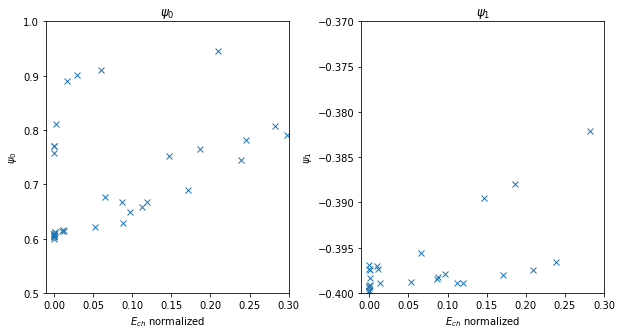

In [175]:
rnd_opt_cst=get_data('NL_opt/rnd_opt_cst_winter_3_1_2_2022_03_02_0252.npy')
rnd_opt_par=get_data('NL_opt/rnd_opt_par_winter_3_1_2_2022_03_02_0252.npy')
e_ch=get_data('sim_data_312_winter_rp0_qf_55/ech_winter_2022_03_08_0707.npy')
# rnd_opt_par=rnd_opt_par[~np.isnan(rnd_opt_par)]

fig,ax=plt.subplots(1,2,figsize=(10,5))
with plt.style.context('science'):
    ax[0].plot(e_ch[:len(rnd_opt_par)],rnd_opt_par[:,0],'x')
    ax[1].plot(e_ch[:len(rnd_opt_par)],rnd_opt_par[:,1],'x')
    ax[0].set_xlim([-0.01,0.3])
    ax[1].set_xlim([-0.01,0.3])
    ax[0].set_ylim([0.5,1])
    ax[1].set_ylim([-0.4,-0.37])
    ax[0].set_title(r'$\psi_0$')
    ax[0].set_xlabel(r'$E_{ch}$ normalized')
    ax[0].set_ylabel(r'$\psi_{0}$')    
    ax[1].set_xlabel(r'$E_{ch}$ normalized')
    ax[1].set_ylabel(r'$\psi_{1}$')
    ax[1].set_title(r'$\psi_1$')
plt.subplots_adjust(wspace=0.3)
plt.savefig('../fig_scripts/par_ech_corr_winter.png')

In [167]:
gps=get_data('sim_data_312_winter_rp0_qf_55/CSBO_loglike1_b05__2022_03_08_0421')
bounds = [(0., 4.),(-1,1)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 100) 
opt=safeopt.SafeOpt(gps,parameter_set,fmin=[-np.inf,0],num_contexts=1)


This is local package in rbc-parameter-tuning
